# Understanding Interlayer Coupling in Few-Layer $MoS_{2}$  through Stacking Configuration Control
* Stacking dependent bandgap of $MoS_{2}$ on (highly )HOPG substrates 


# <font color=blue>Fig 2 C area averaged point spectroscopy data analysis on W & S island </font>

## ($MoS_{2}$ islands on HOPG substrates) STS data analysis 
## (Fig 2- c & d  STS on W&S  )
> * file loading : **pd.cvs**
    > * Loading the cvs data file (*.cvs) 
    > * point data collected & averagd with excel in advance 
    
* Authors : Dr. Jewook Park(ORNL, & IBS )
    * *Center for Nanophase Materials Sciences, Oak Ridge National Laboratory, Oak Ridge, Tennessee 37831, USA *
    * *Center for van der Waals Quantum Solid, Institute for Basic Science (IBS), Pohang 37673, Korea* 
    * *Center for Artificial Low Dimensional Electronic Systems, Institute for Basic Science (IBS), Pohang, Korea* 
    * email :  parkj1@ornl.gov
    
    
> **SPMpy** is a python package for scanning probe microscopy (SPM) data analysis, such as scanning tunneling microscopy and spectroscopy (STM/S) data and atomic force microscopy (AFM) images, which are inherently multidimensional. To analyze SPM data, SPMpy exploits recent image processing(a.k.a. Computer Vision) techniques. SPMpy data analysis functions utilize well-established Python packages, such as Numpy, PANDAS, matplotlib, Seaborn, holoview, etc. In addition, many parts are inspired by well-known SPM data analysis programs, for example, Wsxm(https://aip.scitation.org/doi/10.1063/1.2432410) and Gwyddion(http://gwyddion.net/). Also, SPMpy is trying to apply lessons from 'Fundamentals in Data Visualization'(https://clauswilke.com/dataviz/).

>  **SPMpy** is an open-source project. (Github: https://github.com/Jewook-Park/SPMPY )
> * Contributions, comments, ideas, and error reports are always welcome. Please use the Github page or email jewookpark@ibs.re.kr. Comments & remarks should be in Korean or English. 



# Import modules and functions 

## **1.Preparation** 
* Import necessary packages
    
### loading SPMpy functions
    
* SPMpy_file_loading_funcs.py 
* SPMpy_data_analysis_funcs_sxm.py 


In [1]:
########################################
    #    * Step 1-1
    #    : Import necessary packages 
    #        import modules        
#########################################

import os
import glob
import numpy as np
import pandas as pd
import scipy as sp
from warnings import warn
from scipy import signal

import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns
import skimage
import seaborn_image as isns

import panel as pn
import panel.widgets as pnw
import ipywidgets as ipw

from scipy.signal import find_peaks

# some packages may be yet to be installed
# please install "seaborn-image" via conda to avoid install error 
# conda install -c conda-forge seaborn-image
try:
     from pptx import Presentation
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named Presentation')
    !pip install python-pptx  
    from pptx import Presentation
    from pptx.util import Inches, Pt

try:
    import nanonispy as nap
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named nanonispy')
    !pip install nanonispy
    import nanonispy as nap



try:
    import xarray as xr
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named xarray')
    
    !pip install xarray 
    import xarray as xr
    
try:
    import xrft
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named xrft')
    !pip install xrft 
    import xrft
    
    
try:
    import holoviews as hv
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named holoviews')
    !pip install holoviews 
    import holoviews as hv
    
try:
    import hvplot.xarray
    import hvplot.pandas 
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named hvplot')
    !pip install hvplot
    import hvplot.xarray
    import hvplot.pandas 

    
    
from SPMpy_file_loading_funcs import *
from SPMpy_2D_data_analysis_funcs import *
from SPMpy_3D_data_analysis_funcs import *



C:\Users\gkp\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# 2. CSV DATA Import 
    
* check all SPM data files in the given folder 
    * use **FilesInFolder** function
        * input : **file path**
        * return DataFrame columns = ['group','num','filename']



In [2]:
# check the sxm files in the given folder
#target_path = r'C:\IBS CALDES data\IBS Epitaxial vdW Quantum Solid\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure 2'

target_path = r'C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure 2'

# add 'r' to avoid unicodeerror 
#######

file_list_df = files_in_folder(target_path)
csv_file_list_df = file_list_df[file_list_df.type=='csv']
#csv_file_list_df.file_name

STS_234ML = pd.read_csv(csv_file_list_df.file_name.iloc[0])
#grid_file_list_df = file_list_df[file_list_df.type=='3ds']
# file_list_df
#grid_file_groups = list (set(grid_file_list_df['group']))
# file groups
#grid_file_groups

#############################
# 3ds file loading by using Grid2xr
# xr format으로 파일 불러오기 
# (e.g.) # Grid2xr(file_list_df.file_name.iloc[0])
#############################
#spmdata_xr = img2xr(file_list_df.file_name[0])


Current Path =  C:\Users\gkp\Documents\GitHub\MoS2_HOPG
Changed Path =  C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure 2
                     group  num                      file_name type
0          MoS2_HOPG_78K_0  014         MoS2_HOPG_78K_0014.sxm  sxm
1          MoS2_HOPG_78K_0  033         MoS2_HOPG_78K_0033.sxm  sxm
2          MoS2_HOPG_78K_0  034         MoS2_HOPG_78K_0034.sxm  sxm
3        Grid Spectroscopy  001       Grid Spectroscopy001.3ds  3ds
4        Grid Spectroscopy  002       Grid Spectroscopy002.3ds  3ds
5   Grid Spectroscopy_line  001  Grid Spectroscopy_line001.3ds  3ds
6   Grid Spectroscopy_line  002  Grid Spectroscopy_line002.3ds  3ds
7   Grid Spectroscopy_line  003  Grid Spectroscopy_line003.3ds  3ds
8   Grid Spectroscopy_line  004  Grid Spectroscopy_line004.3ds  3ds
9   Grid Spectroscopy_line  005  Grid Spectroscopy_line005.3ds  3ds
10  Grid Spectroscopy_line  006  Grid S

<Axes: xlabel='bias_mV'>

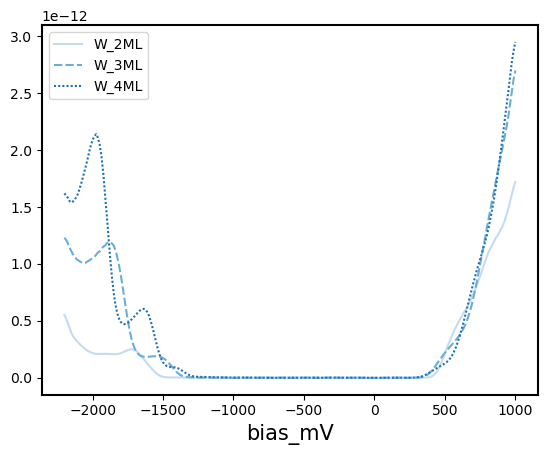

In [3]:
STS_234ML_W = STS_234ML.iloc[:,0:4].set_index('bias_mV')
sns.lineplot(data = STS_234ML_W, palette = "Blues")

<Axes: xlabel='bias_mV'>

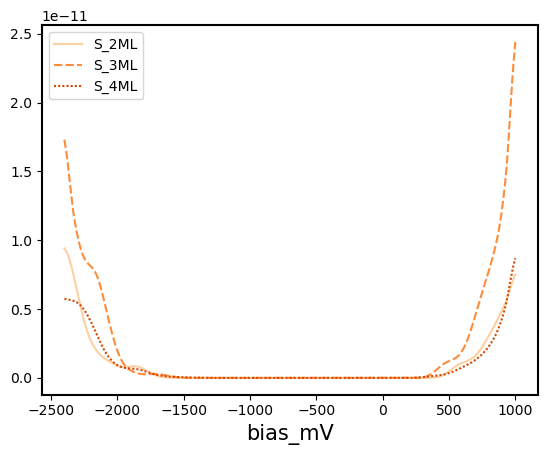

In [4]:
STS_234ML_S = STS_234ML.iloc[:,5:9].rename(columns = {'bias_mV.1':'bias_mV'}).set_index('bias_mV')
sns.lineplot(data = STS_234ML_S, palette = "Oranges")

In [5]:
W_234ML_xr = STS_234ML_W.to_xarray()
S_234ML_xr = STS_234ML_S.to_xarray()

In [6]:
from scipy.signal import savgol_filter

# 1st derivative 
W_234ML_xr_1deriv = W_234ML_xr.differentiate(coord = 'bias_mV')
W_234ML_xr_1deriv_sg = W_234ML_xr_1deriv.copy()

S_234ML_xr_1deriv = S_234ML_xr.differentiate(coord = 'bias_mV')
S_234ML_xr_1deriv_sg = S_234ML_xr_1deriv.copy()


for ch in W_234ML_xr_1deriv:
    W_234ML_xr_1deriv_sg[ch].values =  savgol_filter(W_234ML_xr_1deriv[ch].values,
                                                     window_length = 7,
                                                     polyorder = 3)
    
for ch in S_234ML_xr_1deriv:
    S_234ML_xr_1deriv_sg[ch].values =  savgol_filter(S_234ML_xr_1deriv[ch].values,
                                                     window_length = 7,
                                                     polyorder = 3)

<Axes: xlabel='bias_mV'>

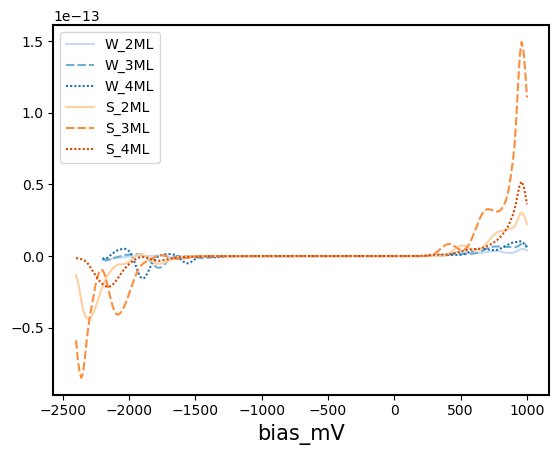

In [7]:
sns.lineplot(data = W_234ML_xr_1deriv_sg.to_dataframe(),palette = "Blues")
sns.lineplot(data = S_234ML_xr_1deriv_sg.to_dataframe(),palette = "Oranges")

In [8]:
# 2nd derivative 

W_234ML_xr_2deriv = W_234ML_xr_1deriv_sg.differentiate(coord = 'bias_mV')
W_234ML_xr_2deriv_sg = W_234ML_xr_2deriv.copy()

S_234ML_xr_2deriv = S_234ML_xr_1deriv_sg.differentiate(coord = 'bias_mV')
S_234ML_xr_2deriv_sg = S_234ML_xr_2deriv.copy()

for ch in W_234ML_xr_2deriv:
    W_234ML_xr_2deriv_sg[ch].values =  savgol_filter(W_234ML_xr_2deriv[ch].values,
                                                     window_length = 7,
                                                     polyorder = 3)

for ch in S_234ML_xr_2deriv:
    S_234ML_xr_2deriv_sg[ch].values =  savgol_filter(S_234ML_xr_2deriv[ch].values,
                                                     window_length = 7,
                                                     polyorder = 3)
    



<Axes: xlabel='bias_mV'>

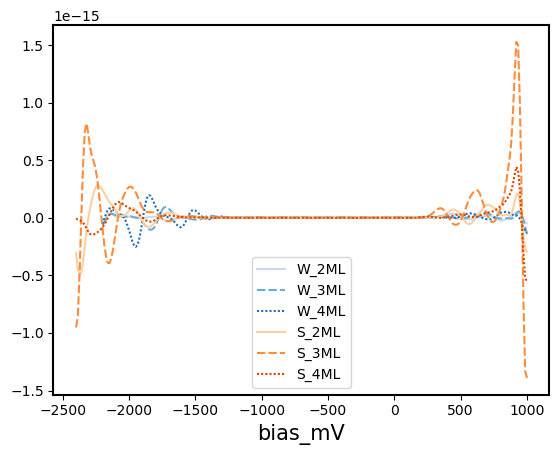

In [9]:
sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),palette = "Blues")
sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),palette = "Oranges")

In [10]:
# find the 1st derivative peak  to assgin band edge 

for ch in W_234ML_xr_1deriv_sg:
    W_234ML_xr_1deriv_sg[ch+'_pks'] = xr.DataArray(find_peaks(W_234ML_xr_1deriv_sg[ch].values))
    W_234ML_xr_1deriv_sg[ch+'_dps'] = xr.DataArray(find_peaks(-1*W_234ML_xr_1deriv_sg[ch].values))
    # channel 별로 서로다른 number  of peaks  --> 하나로 묶어야함. 
    # 하나로 묶어내고 나서 값을 불러오는 방법은? 
    ############################################
    # W_234ML_xr_2deriv_sg.W_3ML_dps.data.item()[0]
    ############################################
    
for ch in S_234ML_xr_1deriv_sg:
    S_234ML_xr_1deriv_sg[ch+'_pks'] = xr.DataArray(find_peaks(S_234ML_xr_1deriv_sg[ch].values))
    S_234ML_xr_1deriv_sg[ch+'_dps'] = xr.DataArray(find_peaks(-1*S_234ML_xr_1deriv_sg[ch].values))

In [11]:
# find the 2st derivative peak   to assgin peak position in dIdV

for ch in W_234ML_xr_2deriv_sg:
    W_234ML_xr_2deriv_sg[ch+'_pks'] = xr.DataArray(find_peaks(W_234ML_xr_2deriv_sg[ch].values))    
    W_234ML_xr_2deriv_sg[ch+'_dps'] = xr.DataArray(find_peaks(-1*W_234ML_xr_2deriv_sg[ch].values))
    # channel 별로 서로다른 number  of peaks  --> 하나로 묶어야함. 
    # 하나로 묶어내고 나서 값을 불러오는 방법은? 
    ############################################
    # W_234ML_xr_2deriv_sg.W_3ML_dps.data.item()[0]
    ############################################
    
for ch in S_234ML_xr_2deriv_sg:
    S_234ML_xr_2deriv_sg[ch+'_pks'] = xr.DataArray(find_peaks(S_234ML_xr_2deriv_sg[ch].values))
    S_234ML_xr_2deriv_sg[ch+'_dps'] = xr.DataArray(find_peaks(-1*S_234ML_xr_2deriv_sg[ch].values))

In [12]:
#W_234ML_xr_1deriv_sg
# pks N dps
W1_2_pks = W_234ML_xr_1deriv_sg.W_2ML_pks.data.item()[0]
W1_3_pks = W_234ML_xr_1deriv_sg.W_3ML_pks.data.item()[0]
W1_4_pks = W_234ML_xr_1deriv_sg.W_4ML_pks.data.item()[0]
W1_2_dps = W_234ML_xr_1deriv_sg.W_2ML_dps.data.item()[0]
W1_3_dps = W_234ML_xr_1deriv_sg.W_3ML_dps.data.item()[0]
W1_4_dps = W_234ML_xr_1deriv_sg.W_4ML_dps.data.item()[0]

#S_234ML_xr_1deriv_sg
# pks N dps
S1_2_pks = S_234ML_xr_1deriv_sg.S_2ML_pks.data.item()[0]
S1_3_pks = S_234ML_xr_1deriv_sg.S_3ML_pks.data.item()[0]
S1_4_pks = S_234ML_xr_1deriv_sg.S_4ML_pks.data.item()[0]
S1_2_dps = S_234ML_xr_1deriv_sg.S_2ML_dps.data.item()[0]
S1_3_dps = S_234ML_xr_1deriv_sg.S_3ML_dps.data.item()[0]
S1_4_dps = S_234ML_xr_1deriv_sg.S_4ML_dps.data.item()[0]


#W_234ML_xr_2deriv_sg
# pks N dps
W2_2_pks = W_234ML_xr_2deriv_sg.W_2ML_pks.data.item()[0]
W2_3_pks = W_234ML_xr_2deriv_sg.W_3ML_pks.data.item()[0]
W2_4_pks = W_234ML_xr_2deriv_sg.W_4ML_pks.data.item()[0]
W2_2_dps = W_234ML_xr_2deriv_sg.W_2ML_dps.data.item()[0]
W2_3_dps = W_234ML_xr_2deriv_sg.W_3ML_dps.data.item()[0]
W2_4_dps = W_234ML_xr_2deriv_sg.W_4ML_dps.data.item()[0]

#S_234ML_xr_2deriv_sg
# pks N dps
S2_2_pks = S_234ML_xr_2deriv_sg.S_2ML_pks.data.item()[0]
S2_3_pks = S_234ML_xr_2deriv_sg.S_3ML_pks.data.item()[0]
S2_4_pks = S_234ML_xr_2deriv_sg.S_4ML_pks.data.item()[0]
S2_2_dps = S_234ML_xr_2deriv_sg.S_2ML_dps.data.item()[0]
S2_3_dps = S_234ML_xr_2deriv_sg.S_3ML_dps.data.item()[0]
S2_4_dps = S_234ML_xr_2deriv_sg.S_4ML_dps.data.item()[0]


##########
# W&S 2nd derivative dps => W&S peak
# W&S 1st derivative pks&dps => W&S IETS 


In [13]:
# filtering the peaks & dips 
# LDOS at peak position >  resolutin limit 
# set LDOS limit 
LIX_limit= 2E-15
# W type, 1st deriv peaks & dips
W1_2ML_pks = W1_2_pks[(W_234ML_xr.W_2ML[W1_2_pks] > LIX_limit).values]
W1_3ML_pks = W1_3_pks[(W_234ML_xr.W_3ML[W1_3_pks] > LIX_limit).values]
W1_4ML_pks = W1_4_pks[(W_234ML_xr.W_4ML[W1_4_pks] > LIX_limit).values]

W1_2ML_dps = W1_2_dps[(W_234ML_xr.W_2ML[W1_2_dps] > LIX_limit).values]
W1_3ML_dps = W1_3_dps[(W_234ML_xr.W_3ML[W1_3_dps] > LIX_limit).values]
W1_4ML_dps = W1_4_dps[(W_234ML_xr.W_4ML[W1_4_dps] > LIX_limit).values]

# W type, 2nd deriv peaks & dips
W2_2ML_pks = W2_2_pks[(W_234ML_xr.W_2ML[W2_2_pks] > LIX_limit).values]
W2_3ML_pks = W2_3_pks[(W_234ML_xr.W_3ML[W2_3_pks] > LIX_limit).values]
W2_4ML_pks = W2_4_pks[(W_234ML_xr.W_4ML[W2_4_pks] > LIX_limit).values]

W2_2ML_dps = W2_2_dps[(W_234ML_xr.W_2ML[W2_2_dps] > LIX_limit).values]
W2_3ML_dps = W2_3_dps[(W_234ML_xr.W_3ML[W2_3_dps] > LIX_limit).values]
W2_4ML_dps = W2_4_dps[(W_234ML_xr.W_4ML[W2_4_dps] > LIX_limit).values]

# S type, 1st deriv peaks & dips
S1_2ML_pks = S1_2_pks[(S_234ML_xr.S_2ML[S1_2_pks] > LIX_limit).values]
S1_3ML_pks = S1_3_pks[(S_234ML_xr.S_3ML[S1_3_pks] > LIX_limit).values]
S1_4ML_pks = S1_4_pks[(S_234ML_xr.S_4ML[S1_4_pks] > LIX_limit).values]

S1_2ML_dps = S1_2_dps[(S_234ML_xr.S_2ML[S1_2_dps] > LIX_limit).values]
S1_3ML_dps = S1_3_dps[(S_234ML_xr.S_3ML[S1_3_dps] > LIX_limit).values]
S1_4ML_dps = S1_4_dps[(S_234ML_xr.S_4ML[S1_4_dps] > LIX_limit).values]

# S type, 2nd deriv peaks & dips
S2_2ML_pks = S2_2_pks[(S_234ML_xr.S_2ML[S2_2_pks] > LIX_limit).values]
S2_3ML_pks = S2_3_pks[(S_234ML_xr.S_3ML[S2_3_pks] > LIX_limit).values]
S2_4ML_pks = S2_4_pks[(S_234ML_xr.S_4ML[S2_4_pks] > LIX_limit).values]

S2_2ML_dps = S2_2_dps[(S_234ML_xr.S_2ML[S2_2_dps] > LIX_limit).values]
S2_3ML_dps = S2_3_dps[(S_234ML_xr.S_3ML[S2_3_dps] > LIX_limit).values]
S2_4ML_dps = S2_4_dps[(S_234ML_xr.S_4ML[S2_4_dps] > LIX_limit).values]



##########
# W&S 2nd derivative dps => W&S peak
# W&S 1st derivative pks&dps => W&S IETS 


### Find peak positions 
* using 2nd derivative of each curves
* __Local minimums in d2(LDOS)/dV2) = Peaks in LDOS__
* delete the minor peak ( comes from ripples in the gap region)

[ 10  23  40  64 221 241]
[ 23  40 221 241]


Text(0.5, 0.98, 'W2_2ML_peaks')

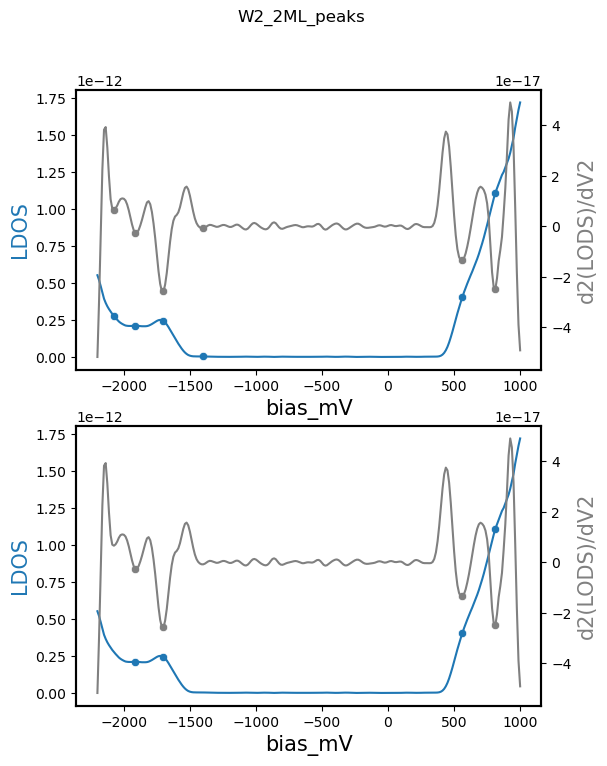

In [14]:
print(W2_2ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML',
             ax=axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_2ML_dps],
                y = W_234ML_xr.W_2ML[W2_2ML_dps],
                ax=axs[0], color  = 'tab:blue')
axs[0].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_2ML_dps], 
                y = W_234ML_xr_2deriv_sg.W_2ML[W2_2ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
W2_2ML_dps_slct = W2_2ML_dps[[1,2,4,5]]
print(W2_2ML_dps_slct)


sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML',
             ax= axs[1], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_2ML_dps_slct],
                y = W_234ML_xr.W_2ML[W2_2ML_dps_slct],
                ax= axs[1], color  = 'tab:blue')
axs[1].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_2ML[W2_2ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('W2_2ML_peaks')

[  8  15  29  57  74 216 241 246]
[ 29  57 216 241]


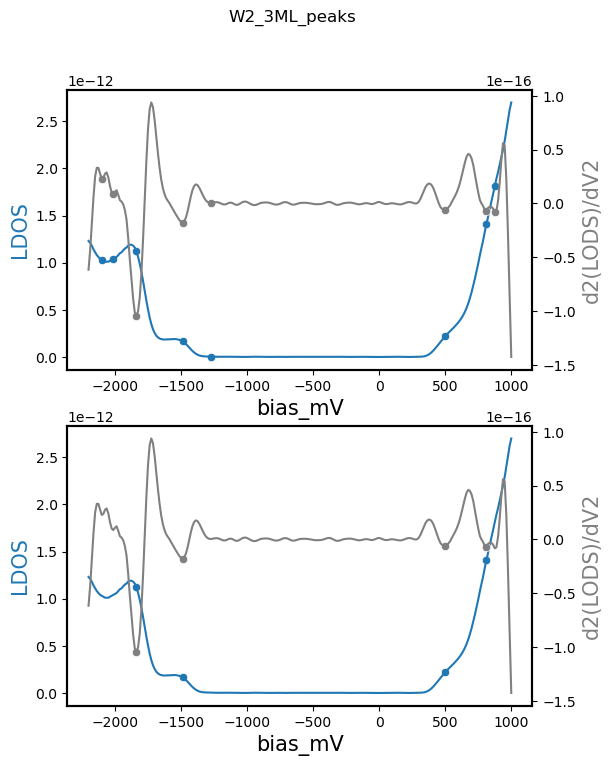

In [15]:
print(W2_3ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML',
             ax=axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_3ML_dps],
                y = W_234ML_xr.W_3ML[W2_3ML_dps],
                ax=axs[0], color  = 'tab:blue')
axs[0].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_3ML_dps], 
                y = W_234ML_xr_2deriv_sg.W_3ML[W2_3ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
W2_3ML_dps_slct = W2_3ML_dps[[2,3,5,6]]
print(W2_3ML_dps_slct)


sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML',
             ax= axs[1], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_3ML_dps_slct],
                y = W_234ML_xr.W_3ML[W2_3ML_dps_slct],
                ax= axs[1], color  = 'tab:blue')
axs[1].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_3ML[W2_3ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('W2_3ML_peaks')
plt.show()

[ 20  47  64  80  88 211 233]
[ 20  47  64 211 233]


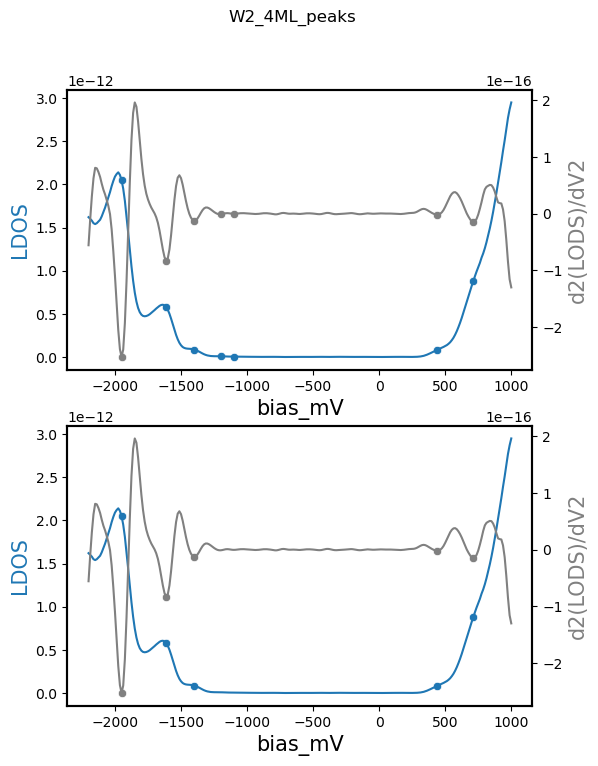

In [16]:
print(W2_4ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML',
             ax=axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_4ML_dps],
                y = W_234ML_xr.W_4ML[W2_4ML_dps],
                ax=axs[0], color  = 'tab:blue')
axs[0].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_4ML_dps], 
                y = W_234ML_xr_2deriv_sg.W_4ML[W2_4ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
W2_4ML_dps_slct = W2_4ML_dps[[0,1,2,5,6]]
print(W2_4ML_dps_slct)


sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML',
             ax= axs[1], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr.W_4ML[W2_4ML_dps_slct],
                ax= axs[1], color  = 'tab:blue')
axs[1].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_4ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_4ML[W2_4ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('W2_4ML_peaks')
plt.show()


[  2  26  41  64 223 242 246]
[  2  41 223 242]


Text(0.5, 0.98, 'S2_2ML_peaks')

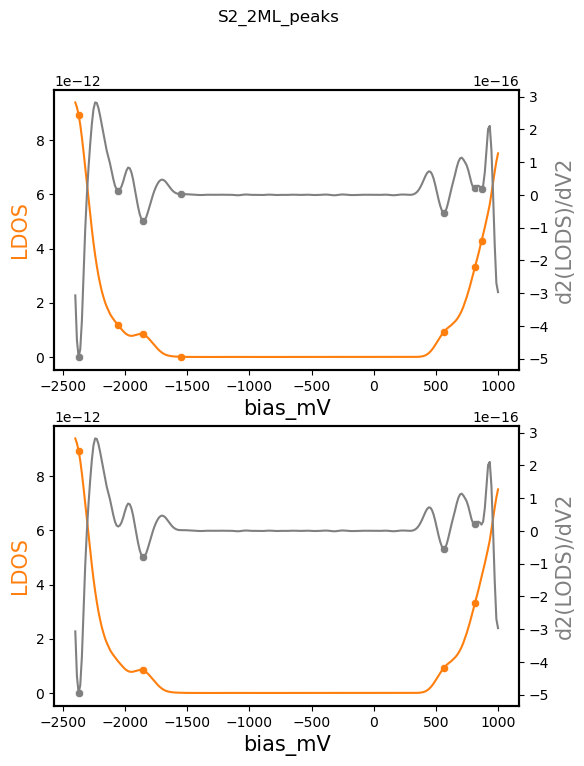

In [17]:
print(S2_2ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML',
             ax=axs[0], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps],
                y = S_234ML_xr.S_2ML[S2_2ML_dps],
                ax=axs[0], color  = 'tab:orange')
axs[0].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_2ML_dps], 
                y = S_234ML_xr_2deriv_sg.S_2ML[S2_2ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
S2_2ML_dps_slct = S2_2ML_dps[[0,2,4,5]]
print(S2_2ML_dps_slct)


sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML',
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps_slct],
                y = S_234ML_xr.S_2ML[S2_2ML_dps_slct],
                ax= axs[1], color  = 'tab:orange')
axs[1].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_2ML[S2_2ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('S2_2ML_peaks')

[ 19  41  52 216 237]
[ 19  52 216 237]


Text(0.5, 0.98, 'S2_3ML_peaks')

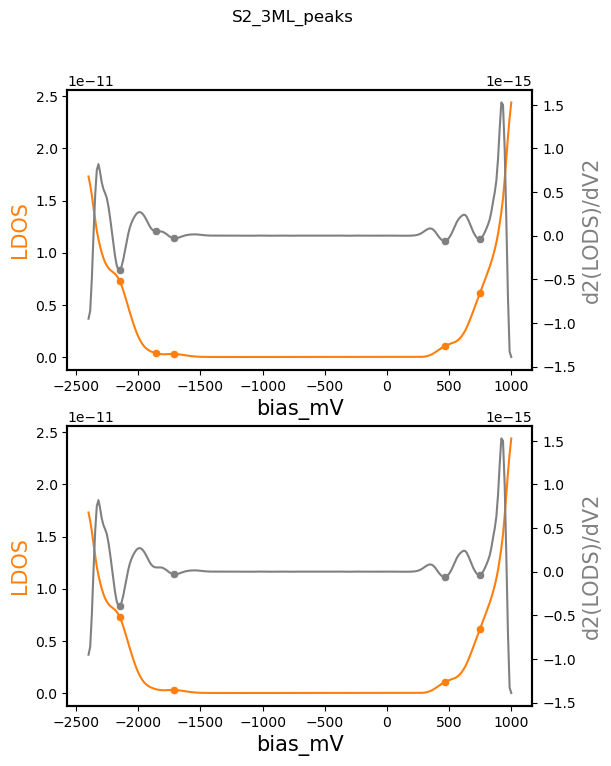

In [18]:
print(S2_3ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML',
             ax=axs[0], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps],
                y = S_234ML_xr.S_3ML[S2_3ML_dps],
                ax=axs[0], color  = 'tab:orange')
axs[0].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_3ML_dps], 
                y = S_234ML_xr_2deriv_sg.S_3ML[S2_3ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
S2_3ML_dps_slct = S2_3ML_dps[[0,2,3,4]]
print(S2_3ML_dps_slct)


sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML',
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps_slct],
                y = S_234ML_xr.S_3ML[S2_3ML_dps_slct],
                ax= axs[1], color  = 'tab:orange')
axs[1].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_3ML[S2_3ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('S2_3ML_peaks')

[  9  42  64  76  83 207 226]
[  9  42  64 207 226]


Text(0.5, 0.98, 'S2_4ML_peaks')

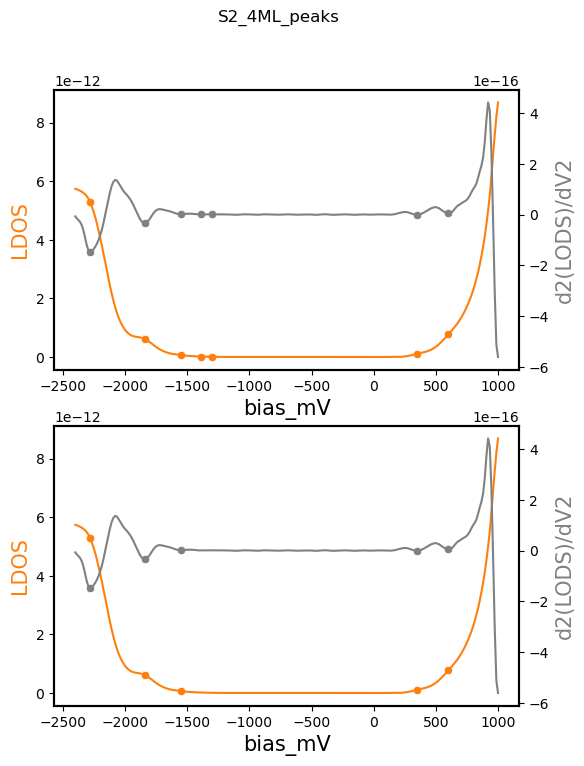

In [19]:
print(S2_4ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML',
             ax=axs[0], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps],
                y = S_234ML_xr.S_4ML[S2_4ML_dps],
                ax=axs[0], color  = 'tab:orange')
axs[0].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_4ML_dps], 
                y = S_234ML_xr_2deriv_sg.S_4ML[S2_4ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')



# selected peak points 
S2_4ML_dps_slct = S2_4ML_dps[[0,1,2,5,6]]
print(S2_4ML_dps_slct)


sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML',
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr.S_4ML[S2_4ML_dps_slct],
                ax= axs[1], color  = 'tab:orange')
axs[1].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_4ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_4ML[S2_4ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('S2_4ML_peaks')

###  HOPG & 1ML data loading 
* line STS averaged  
* saved with pickle 


In [20]:
Line_HOPG1ML = pd.read_pickle(target_path+"./lineSTS_HOPG_1ML.pkl")
Line_HOPG1ML
#'layer' channel is not numeric. 
# ==> error for groupby aggregation applying 

# Define a function to convert the 'layer' column of the DataFrame into numeric values
def layer_to_numeric(layer_str):
    # Convert 'HOPG' to 0
    if layer_str == 'HOPG':
        return 0
    # Convert strings ending with 'ML' to integers (e.g., '1ML' to 1)
    elif layer_str.endswith('ML'):
        return int(layer_str[:-2])
    else:
        return None  # Add additional handling for other values if needed

# Apply the function to convert the 'layer' column of the DataFrame into numeric values
Line_HOPG1ML['layer'] = Line_HOPG1ML['layer'].apply(layer_to_numeric)
Line_HOPG1ML

LIX_unit_calc  layer
X            Y            bias_mV                           
0.000000e+00 5.630437e-07  1297.265557       0.000372      0
                           1281.249933       0.000362      0
                           1265.234309       0.000351      0
                           1249.218685       0.000340      0
                           1233.203060       0.000327      0
...                                               ...    ...
5.728896e-08 5.630437e-07 -2738.671732       0.000024      1
                          -2754.687356       0.000026      1
                          -2770.702980       0.000029      1
                          -2786.718604       0.000031      1
                          -2802.734228       0.000034      1

[5140 rows x 2 columns]

In [21]:
#WS1ML = Line_HOPG1ML[Line_HOPG1ML.layer == '1ML'].groupby('bias_mV').mean()

# due to upper 'layer_to_numeric' function, 
# choose the layer == 1
WS1ML = Line_HOPG1ML[Line_HOPG1ML.layer == 1 ].groupby('bias_mV').mean()

In [22]:
WS1ML = WS1ML.drop(columns = ['layer'])
# drop ['layer'] colnumn, or it will make error belower in ravle()

<Axes: xlabel='bias_mV'>

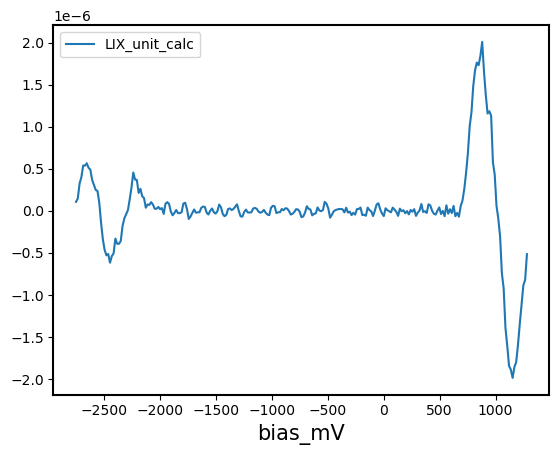

In [23]:
WS1ML_2deriv = WS1ML.diff().diff()
WS1ML_2deriv.rolling(window = 3, center = True).mean().plot()

In [24]:
WS1ML_dps,_ = sp.signal.find_peaks( -1*WS1ML_2deriv.rolling(window = 3, center = True).mean().values.ravel(), height = 1E-7)
WS1ML_dps

array([ 20,  22,  27, 247], dtype=int64)

In [25]:
WS1ML.iloc[WS1ML_dps].index
#WS1ML.index[WS1ML_dps]

Index([-2482.421745080501, -2450.3904967568815, -2370.312375947833,
       1153.1249396502972],
      dtype='float64', name='bias_mV')

<Axes: xlabel='bias_mV'>

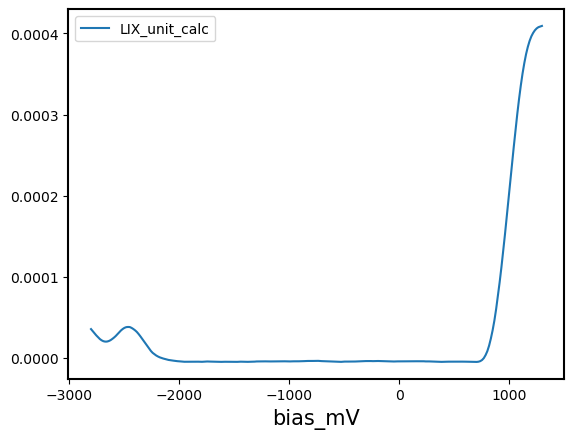

In [26]:
sns.lineplot(data = WS1ML)

In [27]:
WS1ML.iloc[WS1ML_dps]

,LIX_unit_calc
bias_mV,
-2482.421745,0.000038
-2450.390497,0.000038
-2370.312376,0.000029
1153.124940,0.000375


In [28]:
"""fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = WS1ML,
             ax=axs[0], color  = 'tab:gray')
sns.scatterplot(WS1ML.iloc[WS1ML_dps].index ,
                WS1ML.iloc[WS1ML_dps].LIX_unit_calc,
                ax=axs[0], color  = 'tab:gray')
axs[0].set_ylabel('LDOS', color='tab:gray')

sns.lineplot(data = WS1ML_2deriv,
             ax=axs0tw, color  = 'lightgray')
sns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps].index ,
                WS1ML_2deriv.iloc[WS1ML_dps].LIX_unit_calc,
                ax=axs0tw, color  = 'lightgray')
axs0tw.set_ylabel('d2(LODS)/dV2', color='lightgray')

WS1ML_dps_slct = WS1ML_dps[[0,2]]
print(S2_4ML_dps_slct)


sns.lineplot(data = WS1ML,
             ax=axs[1], color  = 'tab:gray')
sns.scatterplot(WS1ML.iloc[WS1ML_dps_slct].index ,
                WS1ML.iloc[WS1ML_dps_slct].LIX_unit_calc,
                ax=axs[1], color  = 'tab:gray')
axs[1].set_ylabel('LDOS', color='tab:gray')

sns.lineplot(data = WS1ML_2deriv,
             ax=axs1tw, color  = 'lightgray')
sns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps_slct].index ,
                WS1ML_2deriv.iloc[WS1ML_dps_slct].LIX_unit_calc,
                ax=axs1tw, color  = 'lightgray')
axs1tw.set_ylabel('d2(LODS)/dV2', color='lightgray')

plt.suptitle('1ML_peaks')"""

"fig,axes = plt.subplots(2,1, figsize = (6,8))\naxs = axes.ravel()\n\naxs0tw = axs[0].twinx()\naxs1tw = axs[1].twinx()\n# double Y setting \n\nsns.lineplot(data = WS1ML,\n             ax=axs[0], color  = 'tab:gray')\nsns.scatterplot(WS1ML.iloc[WS1ML_dps].index ,\n                WS1ML.iloc[WS1ML_dps].LIX_unit_calc,\n                ax=axs[0], color  = 'tab:gray')\naxs[0].set_ylabel('LDOS', color='tab:gray')\n\nsns.lineplot(data = WS1ML_2deriv,\n             ax=axs0tw, color  = 'lightgray')\nsns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps].index ,\n                WS1ML_2deriv.iloc[WS1ML_dps].LIX_unit_calc,\n                ax=axs0tw, color  = 'lightgray')\naxs0tw.set_ylabel('d2(LODS)/dV2', color='lightgray')\n\nWS1ML_dps_slct = WS1ML_dps[[0,2]]\nprint(S2_4ML_dps_slct)\n\n\nsns.lineplot(data = WS1ML,\n             ax=axs[1], color  = 'tab:gray')\nsns.scatterplot(WS1ML.iloc[WS1ML_dps_slct].index ,\n                WS1ML.iloc[WS1ML_dps_slct].LIX_unit_calc,\n                ax=axs[1], color  =

[  9  42  64 207 226]


Text(0.5, 0.98, '1ML_peaks')

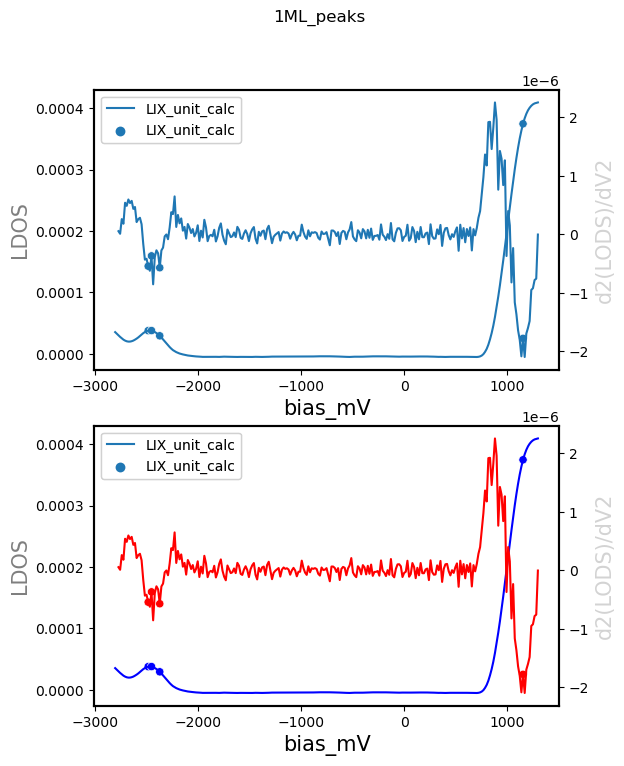

In [29]:
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = WS1ML,
             ax=axs[0], color  = 'tab:gray')
sns.scatterplot(WS1ML.iloc[WS1ML_dps],
                ax=axs[0], color  = 'tab:gray')
axs[0].set_ylabel('LDOS', color='tab:gray')

sns.lineplot(data = WS1ML_2deriv,
             ax=axs0tw, color  = 'lightgray')
sns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps],
                ax=axs0tw, color  = 'lightgray')
axs0tw.set_ylabel('d2(LODS)/dV2', color='lightgray')

WS1ML_dps_slct = WS1ML_dps#[[0,2]]
print(S2_4ML_dps_slct)


sns.lineplot(data = WS1ML,
             ax=axs[1], color  = 'tab:gray')
axs1_scatter = sns.scatterplot(WS1ML.iloc[WS1ML_dps_slct],
                ax=axs[1], color  = 'tab:gray')

axs[1].set_ylabel('LDOS', color='tab:gray')


sns.lineplot(data = WS1ML_2deriv,
             ax=axs1tw, color  = 'lightgray')
axs1tw_scatter= sns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps_slct],
                ax=axs1tw, color  = 'lightgray')
axs1tw.set_ylabel('d2(LODS)/dV2', color='lightgray')

# Retrieve the plot at figure level (axs[1]) and then reassign the line color.
axs[1].lines[0].set_color('blue')
axs1tw.lines[0].set_color('red')
# Retrieve points from the scatterplot
axs1_scatter_points = axs1_scatter.collections[1]
axs1tw_scatter_points = axs1tw_scatter.collections[1]
# Change the color of the points to red
axs1_scatter_points.set(facecolors=['blue'])
axs1tw_scatter_points.set(facecolors=['red'])



plt.suptitle('1ML_peaks')

#### HOPG & 1ML case 

In [30]:
"""sns.set_style("whitegrid")
fig,axs = plt.subplots( figsize = (4,3))

axs0tw = axs.twinx()
W1ML_l = sns.lineplot(data = WS1ML,
             ax=axs, palette  = 'OrRd_r')
sns.scatterplot(WS1ML.iloc[WS1ML_dps_slct].index ,
                WS1ML.iloc[WS1ML_dps_slct].LIX_unit_calc,
                ax=axs, color  = 'salmon')
axs.set_ylabel('LDOS', color='salmon')

W1ML_l_2der= sns.lineplot(data = WS1ML_2deriv,
                          ax=axs0tw, palette  = 'Greys')

sns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps_slct].index ,
                WS1ML_2deriv.iloc[WS1ML_dps_slct].LIX_unit_calc,
                ax=axs0tw, color  = 'black')
axs0tw.set_ylabel('d2(LODS)/dV2', color='black')
W1ML_l.legend(labels = ['1ML'])
plt.suptitle('1ML_peaks')
plt.savefig('1ML_peaks.svg')
plt.show()"""

'sns.set_style("whitegrid")\nfig,axs = plt.subplots( figsize = (4,3))\n\naxs0tw = axs.twinx()\nW1ML_l = sns.lineplot(data = WS1ML,\n             ax=axs, palette  = \'OrRd_r\')\nsns.scatterplot(WS1ML.iloc[WS1ML_dps_slct].index ,\n                WS1ML.iloc[WS1ML_dps_slct].LIX_unit_calc,\n                ax=axs, color  = \'salmon\')\naxs.set_ylabel(\'LDOS\', color=\'salmon\')\n\nW1ML_l_2der= sns.lineplot(data = WS1ML_2deriv,\n                          ax=axs0tw, palette  = \'Greys\')\n\nsns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps_slct].index ,\n                WS1ML_2deriv.iloc[WS1ML_dps_slct].LIX_unit_calc,\n                ax=axs0tw, color  = \'black\')\naxs0tw.set_ylabel(\'d2(LODS)/dV2\', color=\'black\')\nW1ML_l.legend(labels = [\'1ML\'])\nplt.suptitle(\'1ML_peaks\')\nplt.savefig(\'1ML_peaks.svg\')\nplt.show()'

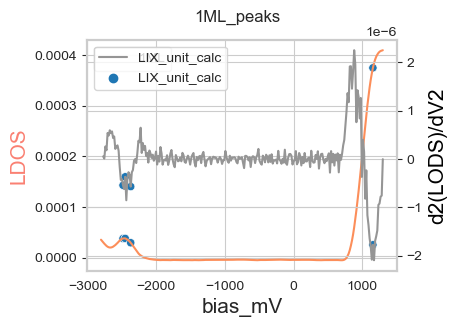

In [31]:
sns.set_style("whitegrid")
fig,axs = plt.subplots( figsize = (4,3))

axs0tw = axs.twinx()
W1ML_l = sns.lineplot(data = WS1ML,
             ax=axs, palette  = 'OrRd_r')
sns.scatterplot(WS1ML.iloc[WS1ML_dps_slct],
                ax=axs, color  = 'salmon')
axs.set_ylabel('LDOS', color='salmon')

W1ML_l_2der= sns.lineplot(data = WS1ML_2deriv,
                          ax=axs0tw, palette  = 'Greys')

sns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps_slct],
                ax=axs0tw, color  = 'black')
axs0tw.set_ylabel('d2(LODS)/dV2', color='black')
W1ML_l.legend(labels = ['1ML'])
plt.suptitle('1ML_peaks')
plt.savefig('1ML_peaks.svg')
plt.show()

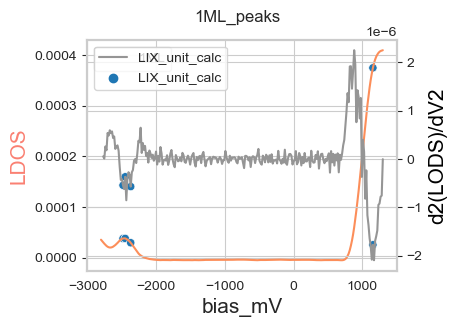

In [32]:
sns.set_style("whitegrid")
fig,axs = plt.subplots( figsize = (4,3))

axs0tw = axs.twinx()
W1ML_l = sns.lineplot(data = WS1ML,
             ax=axs, palette  = 'OrRd_r')
sns.scatterplot(WS1ML.iloc[WS1ML_dps_slct],
                ax=axs, color  = 'salmon')
axs.set_ylabel('LDOS', color='salmon')

W1ML_l_2der= sns.lineplot(data = WS1ML_2deriv,
                          ax=axs0tw, palette  = 'Greys')

sns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps_slct],
                ax=axs0tw, color  = 'black')
axs0tw.set_ylabel('d2(LODS)/dV2', color='black')
W1ML_l.legend(labels = ['1ML'])
plt.suptitle('1ML_peaks')
plt.savefig('1ML_peaks.svg')
plt.show()

### Plot all (2,3,4) curves together 
* with a offset 

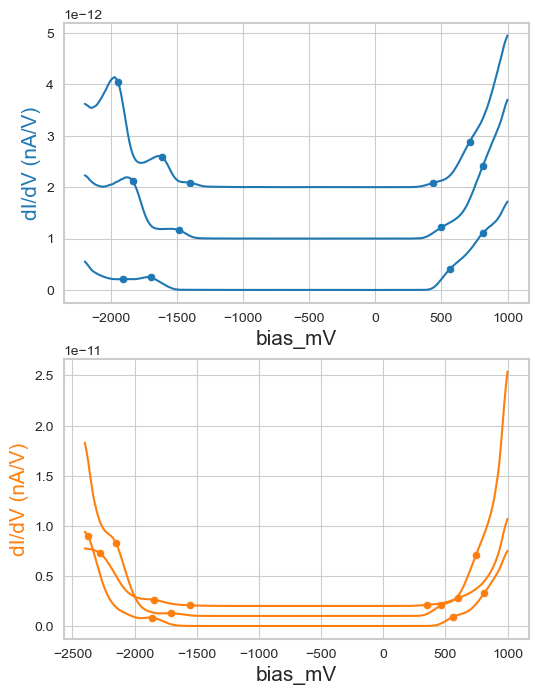

In [33]:
# W stacks 

fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

offset_3ML = 1E-12
offset_4ML = 2E-12

sns.lineplot(data = W_234ML_xr.to_dataframe(), 
             x =  'bias_mV', y = 'W_2ML', 
             ax= axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr.W_2ML[W2_2ML_dps_slct],
                ax= axs[0], color  = 'tab:blue')

sns.lineplot(data = W_234ML_xr.to_dataframe()+offset_3ML, 
             x =  'bias_mV', y = 'W_3ML', 
             ax= axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr.W_3ML[W2_3ML_dps_slct]+offset_3ML,
                ax= axs[0], color  = 'tab:blue')

sns.lineplot(data = W_234ML_xr.to_dataframe()+offset_4ML,
             x =  'bias_mV', y = 'W_4ML',
             ax= axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr.W_4ML[W2_4ML_dps_slct]+offset_4ML,
                ax= axs[0], color  = 'tab:blue')
axs[0].set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234

sns.lineplot(data = S_234ML_xr.to_dataframe(), 
             x =  'bias_mV', y = 'S_2ML', 
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr.S_2ML[S2_2ML_dps_slct],
                ax= axs[1], color  = 'tab:orange')

sns.lineplot(data = S_234ML_xr.to_dataframe()+offset_3ML, 
             x =  'bias_mV', y = 'S_3ML', 
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr.S_3ML[S2_3ML_dps_slct]+offset_3ML,
                ax= axs[1], color  = 'tab:orange')

sns.lineplot(data = S_234ML_xr.to_dataframe()+offset_4ML,
             x =  'bias_mV', y = 'S_4ML',
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr.S_4ML[S2_4ML_dps_slct]+offset_4ML,
                ax= axs[1], color  = 'tab:orange')
axs[1].set_ylabel('dI/dV (nA/V)', color='tab:orange')



plt.show()

### Plot all (2,3,4) curves + Peak positions W+S

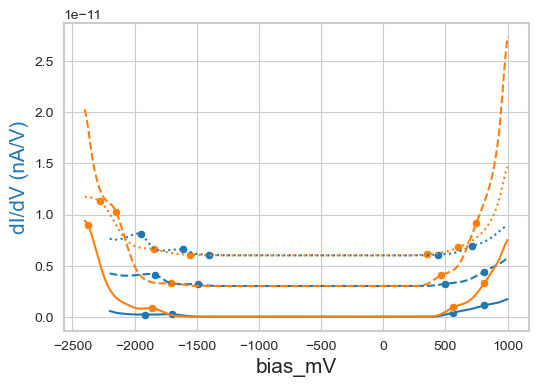

In [34]:
# W stacks 

fig,axs = plt.subplots(figsize = (6,4))

offset_3ML = 3E-12
offset_4ML = 6E-12

sns.lineplot(data = W_234ML_xr.to_dataframe(), 
             x =  'bias_mV', y = 'W_2ML', 
             color  = 'tab:blue',ls ='solid',
             ax= axs)
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr.W_2ML[W2_2ML_dps_slct],
                color  = 'tab:blue',
                ax= axs)

sns.lineplot(data = W_234ML_xr.to_dataframe()+offset_3ML, 
             x =  'bias_mV', y = 'W_3ML', 
             color  = 'tab:blue',ls ='dashed',
             ax= axs)
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr.W_3ML[W2_3ML_dps_slct]+offset_3ML,
                color  = 'tab:blue',
                ax= axs)
                
sns.lineplot(data = W_234ML_xr.to_dataframe()+offset_4ML,
             x =  'bias_mV', y = 'W_4ML',
             color  = 'tab:blue', ls ='dotted',
             ax= axs)
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr.W_4ML[W2_4ML_dps_slct]+offset_4ML,
                color  = 'tab:blue',
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234

sns.lineplot(data = S_234ML_xr.to_dataframe(), 
             x =  'bias_mV', y = 'S_2ML',
             color  = 'tab:orange',ls ='solid',
             ax= axs)
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr.S_2ML[S2_2ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)

sns.lineplot(data = S_234ML_xr.to_dataframe()+offset_3ML, 
             x =  'bias_mV', y = 'S_3ML',
             color  = 'tab:orange',ls ='dashed',
             ax= axs)
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr.S_3ML[S2_3ML_dps_slct]+offset_3ML,
                color  = 'tab:orange',
                ax= axs)

sns.lineplot(data = S_234ML_xr.to_dataframe()+offset_4ML,
             x =  'bias_mV', y = 'S_4ML',
             color  = 'tab:orange', ls ='dotted',
             ax = axs)
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr.S_4ML[S2_4ML_dps_slct]+offset_4ML,
                color  = 'tab:orange',
                ax= axs)


#axs.legend()
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

### Grid (W&S + 2,3,4) of LDOS + d$^2$(LDOS)/dV$^2$

C:\Users\gkp\AppData\Local\Temp\1\ipykernel_36544\66095561.py:140: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


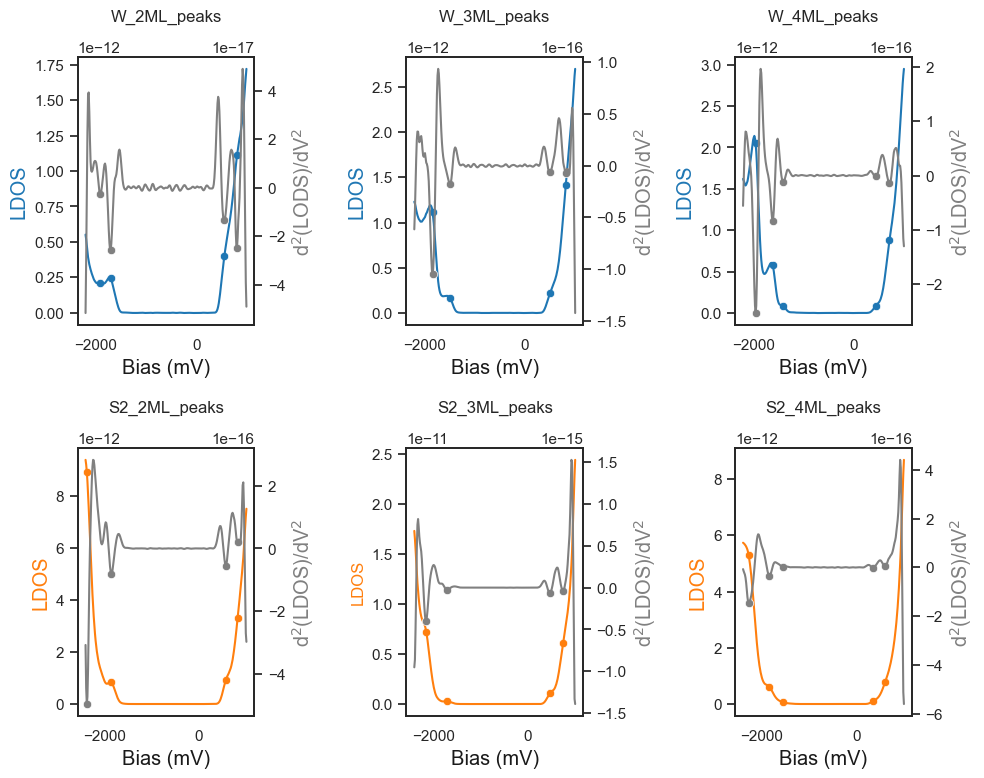

In [35]:
sns.set_theme(style="white")
fig,axes = plt.subplots(2,3, figsize = (10,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
axs2tw = axs[2].twinx()
#W234
axs3tw = axs[3].twinx()
axs4tw = axs[4].twinx()
axs5tw = axs[5].twinx()
#S234
# double Y setting 

#W2ML
sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML',
             ax= axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_2ML_dps_slct],
                y = W_234ML_xr.W_2ML[W2_2ML_dps_slct],
                ax= axs[0], color  = 'tab:blue')
axs[0].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[0].set_ylabel('LDOS', color='tab:blue', fontsize = 'large')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML', 
             ax= axs0tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_2ML[W2_2ML_dps_slct],
                ax= axs0tw, color  = 'grey')
axs0tw.set_ylabel('d$^2$(LODS)/dV$^2$', color='grey', fontsize = 'large')
plt.tight_layout()
axs[0].set_title('W_2ML_peaks', y= 1.1)


#W3ML
sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML',
             ax= axs[1], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_3ML_dps_slct],
                y = W_234ML_xr.W_3ML[W2_3ML_dps_slct],
                ax= axs[1], color  = 'tab:blue')
axs[1].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[1].set_ylabel('LDOS', color='tab:blue', fontsize = 'large')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_3ML[W2_3ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d$^2$(LDOS)/dV$^2$', color='grey', fontsize = 'large')
axs[1].set_title('W_3ML_peaks', y= 1.1)

#W4ML
sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML',
             ax= axs[2], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr.W_4ML[W2_4ML_dps_slct],
                ax= axs[2], color  = 'tab:blue')
axs[2].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[2].set_ylabel('LDOS', color='tab:blue', fontsize = 'large')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML', 
             ax= axs2tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_4ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_4ML[W2_4ML_dps_slct],
                ax= axs2tw, color  = 'grey')
axs2tw.set_ylabel('d$^2$(LDOS)/dV$^2$', color='grey', fontsize = 'large')

axs[2].set_title('W_4ML_peaks', y= 1.1)


#S2ML

sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML',
             ax= axs[3], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps_slct],
                y = S_234ML_xr.S_2ML[S2_2ML_dps_slct],
                ax= axs[3], color  = 'tab:orange')
axs[3].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[3].set_ylabel('LDOS', color='tab:orange', fontsize = 'large')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML', 
             ax= axs3tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_2ML[S2_2ML_dps_slct],
                ax= axs3tw, color  = 'grey')
axs3tw.set_ylabel('d$^2$(LDOS)/dV$^2$', color='grey', fontsize = 'large')

axs[3].set_title('S2_2ML_peaks', y= 1.1)




#S3ML
sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML',
             ax= axs[4], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps_slct],
                y = S_234ML_xr.S_3ML[S2_3ML_dps_slct],
                ax= axs[4], color  = 'tab:orange')
axs[4].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[4].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML', 
             ax= axs4tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_3ML[S2_3ML_dps_slct],
                ax= axs4tw, color  = 'grey')
axs4tw.set_ylabel('d$^2$(LDOS)/dV$^2$', color='grey', fontsize = 'large')

axs[4].set_title('S2_3ML_peaks', y= 1.1)


#S4ML
sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML',
             ax= axs[5], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr.S_4ML[S2_4ML_dps_slct],
                ax= axs[5], color  = 'tab:orange')
axs[5].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[5].set_ylabel('LDOS', color='tab:orange', fontsize = 'large')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML', 
             ax= axs5tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_4ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_4ML[S2_4ML_dps_slct],
                ax= axs5tw, color  = 'grey')
axs5tw.set_ylabel('d$^2$(LDOS)/dV$^2$', color='grey', fontsize = 'large')

axs[5].set_title('S2_4ML_peaks', y= 1.1)
plt.tight_layout()
plt.savefig('W_S_LDOS_peak_finding.svg')

plt.show()

### Plot together  Zoom in 

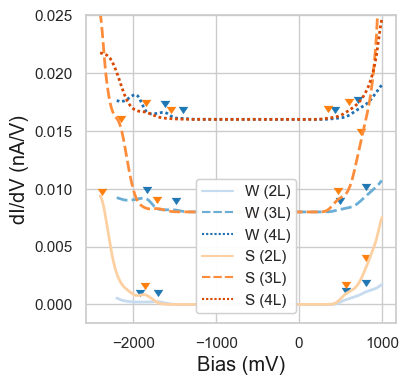

In [36]:
# W stacks 

offset_3ML = 8E-3
offset_4ML = 16E-3

sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


W_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9
W_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML
W_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML

S_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9
S_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML
S_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML


fig,axs = plt.subplots(figsize = (4,4))



sns.lineplot(data = W_234ML_xr_offset.to_dataframe(),
             palette = "Blues",
             lw=2,
             ax =  axs)

sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct]+0.0005,
                color  = 'tab:blue',
                marker =  7, #(tickup) 
                s= 40,
                ax= axs)
sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr_offset.W_3ML[W2_3ML_dps_slct]+0.0005,
                color  = 'tab:blue', 
                marker =  7, #(tickup) 
                s= 40,
                ax= axs)

sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_4ML_dps_slct][1:],
                y = W_234ML_xr_offset.W_4ML[W2_4ML_dps_slct][1:]+0.0005,
                color  = 'tab:blue',
                marker =  7, #(tickup) 
                s= 40,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(data = S_234ML_xr_offset.to_dataframe(),
             palette = "Oranges",
             lw=2,
             ax =  axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr_offset.S_2ML[S2_2ML_dps_slct]+0.0005,
                color  = 'tab:orange',
                marker =  7, #(tickup) 
                s= 40,
                ax= axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr_offset.S_3ML[S2_3ML_dps_slct]+0.0005,
                color  = 'tab:orange',
                marker =  7, #(tickup) 
                s= 40,
                ax= axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_4ML_dps_slct][1:],
                y = S_234ML_xr_offset.S_4ML[S2_4ML_dps_slct][1:]+0.0005,
                color  = 'tab:orange',
                marker =  7, #(tickup) 
                markers= ['^','^','v','v'],
                s= 40,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')


# get legned 
handles0, labels0 = axs.get_legend_handles_labels()

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'S (2L)', 'S (3L)', 'S (4L)']
"""
# divide legends 
handles_WS = handles0[:3]+handles0[8:]
labels_WS = labels0[:3]+labels0[8:]
handles_VC = handles0[3:8]
labels_VC = labels0[3:8]
# new legends
legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.5, 0.5) )
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.5, 0.25) )
"""
legend_WS = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.33, 0.25) )

# add_artist 
#axs.add_artist(legend_WS)
#axs.add_artist(legend_VC)
axs.add_artist(legend_WS)


plt.ylim(top = 0.025)
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

In [37]:
 S_234ML_xr_offset.S_4ML[S2_4ML_dps_slct]

<xarray.DataArray 'S_4ML' (bias_mV: 5)>
array([0.02129  , 0.016615 , 0.0160614, 0.016103 , 0.016774 ])
Coordinates:
  * bias_mV  (bias_mV) float64 -2.28e+03 -1.842e+03 -1.55e+03 349.2 601.6

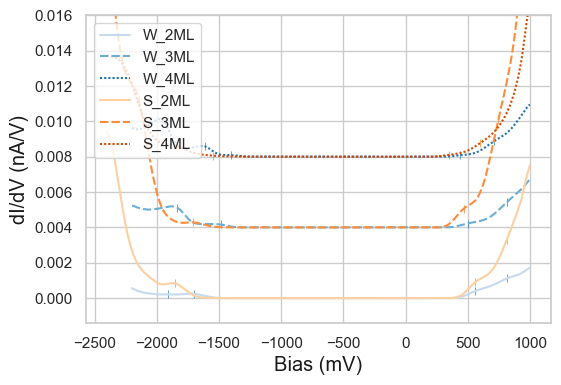

In [38]:
# W stacks 

offset_3ML = 4E-3
offset_4ML = 8E-3

sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


W_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9
W_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML
W_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML

S_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9
S_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML
S_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML


# add a marker indication for the
W_234ML_xr_offset.bias_mV[W2_2ML_dps_slct]
W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct]
W_234ML_xr_offset.W_3ML[W2_3ML_dps_slct]
W_234ML_xr_offset.W_4ML[W2_4ML_dps_slct]


fig,axs = plt.subplots(figsize = (6,4))



sns.lineplot(data = W_234ML_xr_offset.to_dataframe(),
             palette = "Blues",
             ax =  axs)

sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct],
                color  = 'tab:blue',marker = '|',
                ax= axs)
sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr_offset.W_3ML[W2_3ML_dps_slct],
                color  = 'tab:blue', marker = '|',
                ax= axs)

sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr_offset.W_4ML[W2_4ML_dps_slct],
                color  = 'tab:blue',marker = '|',
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(data = S_234ML_xr_offset.to_dataframe(),
             palette = "Oranges",
             ax =  axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr_offset.S_2ML[S2_2ML_dps_slct],
                color  = 'tab:orange',
                marker = '|', 
                ax= axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr_offset.S_3ML[S2_3ML_dps_slct],
                color  = 'tab:orange',marker = '|',
                ax= axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr_offset.S_4ML[S2_4ML_dps_slct],
                color  = 'tab:orange',marker = '|',
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')
plt.ylim(top = 0.016)
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

In [39]:
W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct]

<xarray.DataArray 'W_2ML' (bias_mV: 4)>
array([0.00021 , 0.000243, 0.000404, 0.00111 ])
Coordinates:
  * bias_mV  (bias_mV) float64 -1.912e+03 -1.7e+03 562.5 812.5

### plot for peak positions with markers 
* test 

<Axes: xlabel='x', ylabel='y'>

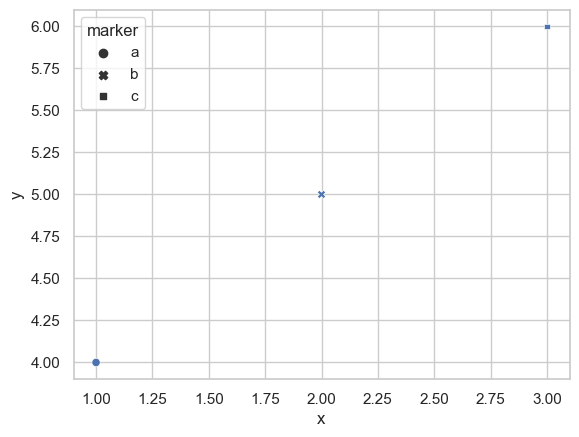

In [40]:
test1 = pd.DataFrame(np.array([[1,2,3],[4,5,6]])).T
test1.columns = ['x','y']
test1['marker'] = np.array(['a','b','c']).T
sns.scatterplot(data = test1, x ='x', y='y',style = 'marker')

### extract the peak positions (+ offset) 
* use the pd.join & merge 



In [41]:
## original data  + offset 
# add a marker indication for the 2ML
# Wedding-cake islands 
W2_2ML_pks = W_234ML_xr_offset.bias_mV[W2_2ML_dps_slct].to_dataframe().join(
    W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct].to_dataframe())
W2_2ML_pks['type']=['V2','V1','C1','C2']
#W2_2ML_pks

# Spiral islands 
S2_2ML_pks = S_234ML_xr_offset.bias_mV[S2_2ML_dps_slct].to_dataframe().join(
    S_234ML_xr_offset.S_2ML[S2_2ML_dps_slct].to_dataframe())
S2_2ML_pks['type']=['V2','V1','C1','C2']
#S2_2ML_pks

In [42]:
# add a marker indication for the 3ML
# Wedding-cake islands 
W2_3ML_pks = W_234ML_xr_offset.bias_mV[W2_3ML_dps_slct].to_dataframe().join(
    W_234ML_xr_offset.W_3ML[W2_3ML_dps_slct].to_dataframe())
W2_3ML_pks['type']=['V2','V1','C1','C2']
#W2_3ML_pks


# Spiral islands 
S2_3ML_pks = S_234ML_xr_offset.bias_mV[S2_3ML_dps_slct].to_dataframe().join(
    S_234ML_xr_offset.S_3ML[S2_3ML_dps_slct].to_dataframe())
#S2_3ML_pks['type']=['V3','V2','V1','C1','C2']
S2_3ML_pks['type']=['V2','V1','C1','C2']
#S2_3ML_pks

In [43]:
S2_3ML_pks

,bias_mV,S_3ML,type
bias_mV,,,
-2147.655901,-2147.655901,0.011240,V2
-1709.374708,-1709.374708,0.004286,V1
468.750009,468.750009,0.005060,C1
747.656223,747.656223,0.010130,C2


In [44]:
# add a marker indication for the 4ML
# Wedding-cake islands 

W2_4ML_pks = W_234ML_xr_offset.bias_mV[W2_4ML_dps_slct].to_dataframe().join(
    W_234ML_xr_offset.W_4ML[W2_4ML_dps_slct].to_dataframe())
W2_4ML_pks['type']=['V3','V2','V1','C1','C2']
#W2_4ML_pks

# Spiral islands 
S2_4ML_pks = S_234ML_xr_offset.bias_mV[S2_4ML_dps_slct].to_dataframe().join(
    S_234ML_xr_offset.S_4ML[S2_4ML_dps_slct].to_dataframe())
S2_4ML_pks['type']=['V3','V2','V1','C1','C2']
#S2_4ML_pks

In [45]:
## original data  + offset 
W_23pks = pd.merge(W2_2ML_pks,W2_3ML_pks,  on ='type', how = "outer")
# 2,3 merge . (left & right)
#W_23pks
W_234pks = pd.merge(W_23pks, W2_4ML_pks,  on ='type', how = "outer")

#W_234pks_offset = pd.merge(W_23pks, W2_4ML_pks,  on ='type', how = "outer")

# 23,4 merge . (left & right)
W_234pks.set_index('type', inplace = True)
W_234pks.columns  = ["bias_mV_2ML","W_2ML","bias_mV_3ML","W_3ML","bias_mV_4ML","W_4ML"]
W_234pks



S_23pks = pd.merge(S2_2ML_pks,S2_3ML_pks,  on ='type', how = "outer")
# 2,3 merge . (left & right)
#S_23pks


S_234pks = pd.merge(S_23pks, S2_4ML_pks,  on ='type', how = "outer")

#S_234pks_offset = pd.merge(S_23pks, S2_4ML_pks,  on ='type', how = "outer")
# 23,4 merge . (left & right)
S_234pks.set_index('type', inplace = True)
S_234pks.columns  = ["bias_mV_2ML","S_2ML","bias_mV_3ML","S_3ML","bias_mV_4ML","S_4ML"]
S_234pks

,bias_mV_2ML,S_2ML,bias_mV_3ML,S_3ML,bias_mV_4ML,S_4ML
type,,,,,,
V2,-2373.437122,0.008940,-2147.655901,0.011240,-1842.187191,0.008615
V1,-1855.468439,0.000833,-1709.374708,0.004286,-1549.999729,0.008061
C1,561.718747,0.000906,468.750009,0.005060,349.218775,0.008103
C2,814.062465,0.003300,747.656223,0.010130,601.562492,0.008774
V3,NaN,NaN,NaN,NaN,-2280.468384,0.013290


In [176]:
print (W_234pks)
print (S_234pks)

      bias_mV_2ML     W_2ML  bias_mV_3ML     W_3ML  bias_mV_4ML     W_4ML
type                                                                     
V2   -1912.499744  0.000210 -1837.499754  0.005120 -1612.499784  0.008579
V1   -1699.999772  0.000243 -1487.499801  0.004164 -1399.999812  0.008086
C1     562.499925  0.000404   499.999933  0.004219   437.499941  0.008081
C2     812.499891  0.001110   812.499891  0.005410   712.499904  0.008879
V3            NaN       NaN          NaN       NaN -1949.999738  0.010050
      bias_mV_2ML     S_2ML  bias_mV_3ML     S_3ML  bias_mV_4ML     S_4ML
type                                                                     
V2   -2373.437122  0.008940 -2147.655901  0.011240 -1842.187191  0.008615
V1   -1855.468439  0.000833 -1709.374708  0.004286 -1549.999729  0.008061
C1     561.718747  0.000906   468.750009  0.005060   349.218775  0.008103
C2     814.062465  0.003300   747.656223  0.010130   601.562492  0.008774
V3            NaN       NaN          N

<Axes: xlabel='bias_mV_2ML', ylabel='W_2ML'>

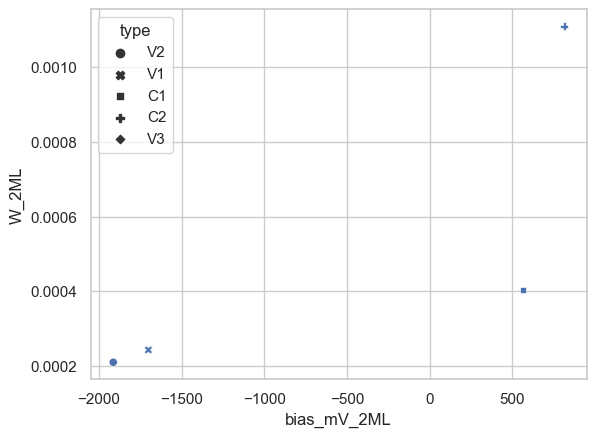

In [47]:
sns.scatterplot(data = W_234pks, x ='bias_mV_2ML', y='W_2ML',style = 'type')

In [175]:
S_234ML

NameError: name 'S_234ML' is not defined

In [49]:
# use the V2V1C1C2 only 

W_234pks = W_234pks[:4]
S_234pks = S_234pks[:4]

### Plot new graph with marker control 


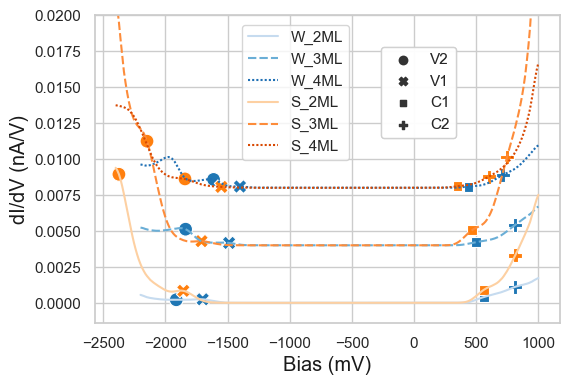

In [50]:
# W stacks 

offset_3ML = 4E-3
offset_4ML = 8E-3

sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


W_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9
W_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML
W_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML

S_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9
S_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML
S_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML


# add a marker indication for the
# W_234pks
# S_234pks


fig,axs = plt.subplots(figsize = (6,4))
sns.lineplot(data = W_234ML_xr_offset.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V2,V1,C1,C2 only.
sns.scatterplot(data = W_234pks[:4],
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks[:4],
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks[:4],
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',
                legend =False,s = 100,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(data = S_234ML_xr_offset.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks[:4],
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks[:4],
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks[:4],
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# get legned 
handles0, labels0 = axs.get_legend_handles_labels()
# divide legends 
handles_WS = handles0[:3]+handles0[7:]
labels_WS = labels0[:3]+labels0[7:]
handles_VC = handles0[3:7]
labels_VC = labels0[3:7]
# new legends
legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.75) )
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.6, 0.75) )
# add_artist 
axs.add_artist(legend_WS)
axs.add_artist(legend_VC)


plt.ylim(top = 0.020)
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

## without offest selected point list

In [51]:
print (W2_2ML_dps_slct)
print (W2_3ML_dps_slct)
print (W2_4ML_dps_slct)
print (S2_2ML_dps_slct)
print (S2_3ML_dps_slct)
print (S2_4ML_dps_slct)

[ 23  40 221 241]
[ 29  57 216 241]
[ 20  47  64 211 233]
[  2  41 223 242]
[ 19  52 216 237]
[  9  42  64 207 226]


In [52]:
# add a marker indication for the
#####################
# W_234pks
# S_234pks
# without offset 
#####################
# W_234pks
# eg ) S_234ML_xr.S_4ML[S2_4ML_dps_slct]
# W2_2ML_dps_slct
# W2_3ML_dps_slct
# W2_4ML_dps_slct
# ==> selected peak points from 2nd deriv dp calc 

W2_2ML_pks_woOffSet = W_234ML_xr.bias_mV[W2_2ML_dps_slct].to_dataframe().join(
    W_234ML_xr.W_2ML[W2_2ML_dps_slct].to_dataframe())
W2_2ML_pks_woOffSet['type']=['V2','V1','C1','C2']

W2_3ML_pks_woOffSet = W_234ML_xr.bias_mV[W2_3ML_dps_slct].to_dataframe().join(
    W_234ML_xr.W_3ML[W2_3ML_dps_slct].to_dataframe())
W2_3ML_pks_woOffSet['type']=['V2','V1','C1','C2']

W2_4ML_pks_woOffSet = W_234ML_xr.bias_mV[W2_4ML_dps_slct].to_dataframe().join(
    W_234ML_xr.W_4ML[W2_4ML_dps_slct].to_dataframe())
W2_4ML_pks_woOffSet['type']=['V3','V2','V1','C1','C2']


S2_2ML_pks_woOffSet = S_234ML_xr.bias_mV[S2_2ML_dps_slct].to_dataframe().join(
    S_234ML_xr.S_2ML[S2_2ML_dps_slct].to_dataframe())
S2_2ML_pks_woOffSet['type']=['V2','V1','C1','C2']

S2_3ML_pks_woOffSet = S_234ML_xr.bias_mV[S2_3ML_dps_slct].to_dataframe().join(
    S_234ML_xr.S_3ML[S2_3ML_dps_slct].to_dataframe())
S2_3ML_pks_woOffSet['type']=['V2','V1','C1','C2']

S2_4ML_pks_woOffSet = S_234ML_xr.bias_mV[S2_4ML_dps_slct].to_dataframe().join(
    S_234ML_xr.S_4ML[S2_4ML_dps_slct].to_dataframe())
S2_4ML_pks_woOffSet['type']=['V3','V2','V1','C1','C2']


## original data  
W_23pks_woOffSet = pd.merge(W2_2ML_pks_woOffSet,W2_3ML_pks_woOffSet, on='type', how='outer')
W_234pks_woOffSet = pd.merge(W_23pks_woOffSet, W2_4ML_pks_woOffSet, on='type', how='outer')
# use the 'type' as a 'key' for merge. 
# do not use pd.concat. it will mess the line 

W_234pks_woOffSet.set_index('type', inplace = True)
W_234pks_woOffSet.columns  = ["bias_mV_2ML","W_2ML","bias_mV_3ML","W_3ML","bias_mV_4ML","W_4ML"]
#W_234pks_woOffSet

S_23pks_woOffSet = pd.merge(S2_2ML_pks_woOffSet,S2_3ML_pks_woOffSet, on='type', how='outer')
S_234pks_woOffSet = pd.merge(S_23pks_woOffSet, S2_4ML_pks_woOffSet, on='type', how='outer')

S_234pks_woOffSet.set_index('type', inplace = True)
S_234pks_woOffSet.columns  = ["bias_mV_2ML","S_2ML","bias_mV_3ML","S_3ML","bias_mV_4ML","S_4ML"]
W_234pks_woOffSet

,bias_mV_2ML,W_2ML,bias_mV_3ML,W_3ML,bias_mV_4ML,W_4ML
type,,,,,,
V2,-1912.499744,2.100000e-13,-1837.499754,1.120000e-12,-1612.499784,5.790000e-13
V1,-1699.999772,2.430000e-13,-1487.499801,1.640000e-13,-1399.999812,8.590000e-14
C1,562.499925,4.040000e-13,499.999933,2.190000e-13,437.499941,8.080000e-14
C2,812.499891,1.110000e-12,812.499891,1.410000e-12,712.499904,8.790000e-13
V3,NaN,NaN,NaN,NaN,-1949.999738,2.050000e-12


## plot new offest graph


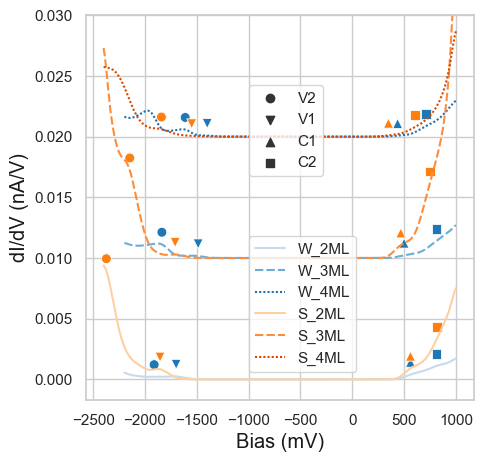

In [53]:
# W stacks 

offset_3ML = 10E-3
offset_4ML = 20E-3

#sns.set_style("whitegrid",  rc = {"grid.linestyle": "dashed"})
sns.set_style("whitegrid",  rc = {"axis_grid": True})
#sns.set_style("white")
#sns.set_style("white",  rc = {"axis_grid": True})

W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


W_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9 
W_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML
W_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML

S_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9
S_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML 
S_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML 


W_234pks_offset = W_234pks_woOffSet.copy()
S_234pks_offset = S_234pks_woOffSet.copy()

W_234pks_offset.W_2ML = (W_234pks_woOffSet.W_2ML)*1E9 +0.001
W_234pks_offset.W_3ML = (W_234pks_woOffSet.W_3ML)*1E9 + offset_3ML +0.001
W_234pks_offset.W_4ML = (W_234pks_woOffSet.W_4ML)*1E9 + offset_4ML +0.001

S_234pks_offset.S_2ML = (S_234pks_woOffSet.S_2ML)*1E9 +0.001
S_234pks_offset.S_3ML = (S_234pks_woOffSet.S_3ML)*1E9 + offset_3ML +0.001
S_234pks_offset.S_4ML = (S_234pks_woOffSet.S_4ML)*1E9 + offset_4ML +0.001
# add +0.001 offset to show marker offset 



# add +0.001 offset to show marker offset 

# add a marker indication for the
# W_234pks
# S_234pks


fig,axs = plt.subplots(figsize = (5,5))
sns.lineplot(data = W_234ML_xr_offset.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V2,V1,C1,C2 only.
sns.scatterplot(data = W_234pks_offset[:4],
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', 
                style = 'type',markers = ['o','v','^','s'],
                legend = True, s = 50,
                ax= axs)
sns.scatterplot(data = W_234pks_offset[:4],
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue',
                style = 'type',markers = ['o','v','^','s'],
                legend =False,s = 50,
                ax= axs)
sns.scatterplot(data = W_234pks_offset[:4],
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', 
                style = 'type',markers = ['o','v','^','s'],
                legend =False,s = 50,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(data = S_234ML_xr_offset.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_offset[:4],
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange',
                style = 'type',markers = ['o','v','^','s'],
                legend =False,s = 50,
                ax= axs)
sns.scatterplot(data = S_234pks_offset[:4],
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', 
                style = 'type',markers = ['o','v','^','s'],
                legend =False,s = 50,
                ax= axs)
sns.scatterplot(data = S_234pks_offset[:4],
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange',
                style = 'type',markers = ['o','v','^','s'],
                legend =False,s = 50,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# get legned 
handles0, labels0 = axs.get_legend_handles_labels()
# divide legends 
handles_WS = handles0[:3]+handles0[7:]
labels_WS = labels0[:3]+labels0[7:]
handles_VC = handles0[3:7]
labels_VC = labels0[3:7]
# new legends
legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.25) )

legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70) )
# add_artist 
axs.add_artist(legend_WS)
#axs.add_artist(legend_VC)


plt.ylim(top = 0.030)
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

In [54]:
W_234pks_offset
# renew index order 

W_234pks_offset_reorder = W_234pks_offset.reindex(['V3', 'V2', 'V1','C1','C2'])
W_234pks_offset_reorder
S_234pks_offset_reorder = S_234pks_offset.reindex(['V3', 'V2', 'V1','C1','C2'])
S_234pks_offset_reorder

,bias_mV_2ML,S_2ML,bias_mV_3ML,S_3ML,bias_mV_4ML,S_4ML
type,,,,,,
V3,NaN,NaN,NaN,NaN,-2280.468384,0.026290
V2,-2373.437122,0.009940,-2147.655901,0.018240,-1842.187191,0.021615
V1,-1855.468439,0.001833,-1709.374708,0.011286,-1549.999729,0.021061
C1,561.718747,0.001906,468.750009,0.012060,349.218775,0.021103
C2,814.062465,0.004300,747.656223,0.017130,601.562492,0.021774


In [55]:
W_234pks_woOffSet
W_234pks_woOffSet_reorder = W_234pks_woOffSet.reindex(['V3', 'V2', 'V1','C1','C2'])
W_234pks_woOffSet_reorder
S_234pks_woOffSet_reorder = S_234pks_woOffSet.reindex(['V3', 'V2', 'V1','C1','C2'])
S_234pks_woOffSet_reorder

,bias_mV_2ML,S_2ML,bias_mV_3ML,S_3ML,bias_mV_4ML,S_4ML
type,,,,,,
V3,NaN,NaN,NaN,NaN,-2280.468384,5.290000e-12
V2,-2373.437122,8.940000e-12,-2147.655901,7.240000e-12,-1842.187191,6.150000e-13
V1,-1855.468439,8.330000e-13,-1709.374708,2.860000e-13,-1549.999729,6.140000e-14
C1,561.718747,9.060000e-13,468.750009,1.060000e-12,349.218775,1.030000e-13
C2,814.062465,3.300000e-12,747.656223,6.130000e-12,601.562492,7.740000e-13


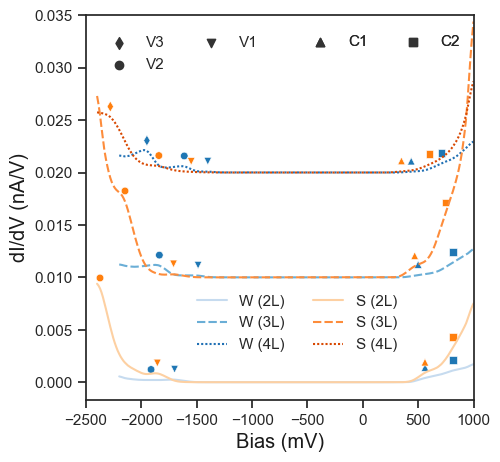

In [56]:
# W stacks 

offset_3ML = 10E-3
offset_4ML = 20E-3

#sns.set_style("whitegrid",  rc = {"grid.linestyle": "dashed"})
#sns.set_style("whitegrid",  rc = {"axis_grid": True})
#sns.set_style("white")
#sns.set_style("whitegrid")
#sns.despine(left=True)
sns.set_style("ticks")

W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


W_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9 
W_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML
W_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML

S_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9
S_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML 
S_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML 


W_234pks_offset = W_234pks_woOffSet_reorder.copy()
S_234pks_offset = S_234pks_woOffSet_reorder.copy()

W_234pks_offset.W_2ML = (W_234pks_woOffSet.W_2ML)*1E9 +0.001
W_234pks_offset.W_3ML = (W_234pks_woOffSet.W_3ML)*1E9 + offset_3ML +0.001
W_234pks_offset.W_4ML = (W_234pks_woOffSet.W_4ML)*1E9 + offset_4ML +0.001

S_234pks_offset.S_2ML = (S_234pks_woOffSet.S_2ML)*1E9 +0.001
S_234pks_offset.S_3ML = (S_234pks_woOffSet.S_3ML)*1E9 + offset_3ML +0.001
S_234pks_offset.S_4ML = (S_234pks_woOffSet.S_4ML)*1E9 + offset_4ML +0.001
# add +0.001 offset to show marker offset 



# add +0.001 offset to show marker offset 

# add a marker indication for the
# W_234pks
# S_234pks


fig,axs = plt.subplots(figsize = (5,5))
sns.lineplot(data = W_234ML_xr_offset.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V2,V1,C1,C2 only.
sns.scatterplot(data = W_234pks_offset[:5],
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', 
                style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 30,
                ax= axs)
sns.scatterplot(data = W_234pks_offset[:5],
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue',
                style = 'type',markers =['d','o','v','^','s'],
                legend =False,s = 30,
                ax= axs)
sns.scatterplot(data = W_234pks_offset[:5],
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', 
                style = 'type',markers = ['d','o','v','^','s'],
                legend =False,s = 30,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(data = S_234ML_xr_offset.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_offset[:5],
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange',
                style = 'type',markers = ['d','o','v','^','s'],
                legend =False,s = 30,
                ax= axs)
sns.scatterplot(data = S_234pks_offset[:5],
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', 
                style = 'type',markers =['d','o','v','^','s'],
                legend =False,s = 30,
                ax= axs)
sns.scatterplot(data = S_234pks_offset[:5],
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange',
                style = 'type',markers =['d','o','v','^','s'],
                legend =False,s = 30,
                ax= axs)

handles0, labels0 = axs.get_legend_handles_labels()
axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# get legned 

# divide legends 

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'V3','V2', 'V1', 'C1', 'C2',  'S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles0[:3]+handles0[-3:]
labels_WS = labels0[:3]+labels0[-3:]

handles_W = handles0[:3]
labels_W = labels0[:3]

handles_S = handles0[-3:]
labels_S = labels0[-3:]

handles_VC = handles0[3:-3]
labels_VC = labels0[3:-3]

handles_V = handles0[3:6]
labels_V = labels0[3:6]
handles_C = handles0[6:8]
labels_C = labels0[6:8]


# new legends
"""
legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.25) )

legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.25, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.55, 0.20),frameon= False )

legend_V = axs.legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.01, 0.90) ,frameon= False, ncol=2 )
legend_C = axs.legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.53, 0.93) ,frameon= False, ncol =2 )


'''
legend_0 = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''


# add_artist 
#axs.add_artist(legend_WS)
#axs.add_artist(legend_VC)

axs.add_artist(legend_W)
axs.add_artist(legend_S)
axs.add_artist(legend_V)
axs.add_artist(legend_C)

plt.ylim(top = 0.035)
plt.xlim((-2500,1000))

plt.savefig('W_S_LDOS_Peaks_5.svg')
plt.show()

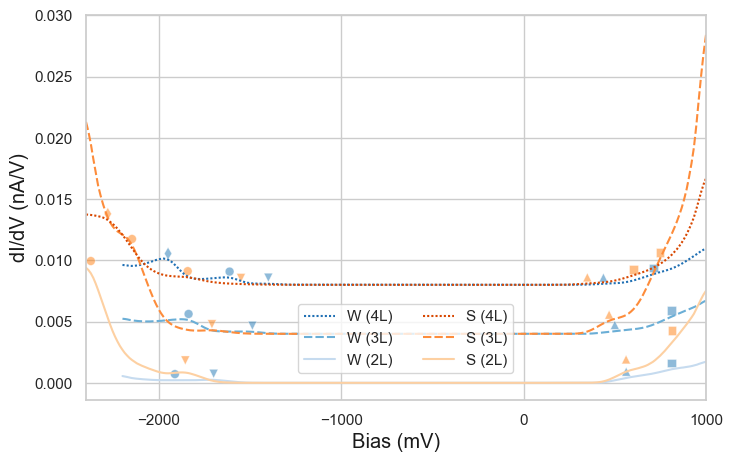

In [57]:
# W stacks 

offset_3ML = 4E-3
offset_4ML = 8E-3

#sns.set_style("whitegrid",  rc = {"grid.linestyle": "dashed"})
#sns.set_style("whitegrid",  rc = {"axis_grid": True})
#sns.set_style("white")
sns.set_style("whitegrid")
#sns.despine(left=True)
#sns.set_style("ticks")

W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


W_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9 
W_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML
W_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML

S_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9
S_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML 
S_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML 


W_234pks_offset = W_234pks_woOffSet_reorder.copy()
S_234pks_offset = S_234pks_woOffSet_reorder.copy()

W_234pks_offset.W_2ML = (W_234pks_woOffSet.W_2ML)*1E9 +0.0005
W_234pks_offset.W_3ML = (W_234pks_woOffSet.W_3ML)*1E9 + offset_3ML +0.0005
W_234pks_offset.W_4ML = (W_234pks_woOffSet.W_4ML)*1E9 + offset_4ML +0.0005

S_234pks_offset.S_2ML = (S_234pks_woOffSet.S_2ML)*1E9 +0.001
S_234pks_offset.S_3ML = (S_234pks_woOffSet.S_3ML)*1E9 + offset_3ML +0.0005
S_234pks_offset.S_4ML = (S_234pks_woOffSet.S_4ML)*1E9 + offset_4ML +0.0005
# add +0.001 offset to show marker offset 



# add +0.001 offset to show marker offset 

# add a marker indication for the
# W_234pks
# S_234pks


fig,axs = plt.subplots(figsize = (8,5))
sns.lineplot(data = W_234ML_xr_offset.to_dataframe(),
             palette = "Blues",
             ax =  axs)

scatter_alpha = 0.5
# plot V2,V1,C1,C2 only.
sns.scatterplot(data = W_234pks_offset[:5],
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', 
                style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 40,
                alpha = scatter_alpha,
                ax= axs)
sns.scatterplot(data = W_234pks_offset[:5],
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue',
                style = 'type',markers =['d','o','v','^','s'],
                legend =False,s = 40,
                alpha = scatter_alpha,
                ax= axs)
sns.scatterplot(data = W_234pks_offset[:5],
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', 
                style = 'type',markers = ['d','o','v','^','s'],
                legend =False,s = 40,
                alpha = scatter_alpha,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(data = S_234ML_xr_offset.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_offset[:5],
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange',
                style = 'type',markers = ['d','o','v','^','s'],
                legend =False,s = 40,
                alpha = scatter_alpha,
                ax= axs)
sns.scatterplot(data = S_234pks_offset[:5],
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', 
                style = 'type',markers =['d','o','v','^','s'],
                legend =False,s = 40,
                alpha = scatter_alpha,
                ax= axs)
sns.scatterplot(data = S_234pks_offset[:5],
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange',
                style = 'type',markers =['d','o','v','^','s'],
                legend =False,s = 40,
                alpha = scatter_alpha,
                ax= axs)
handles0, labels0 = axs.get_legend_handles_labels()

axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# get legned 

# divide legends 

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'V3','V2', 'V1', 'C1', 'C2',  'S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles0[:3][::-1]+handles0[-3:][::-1]
labels_WS = labels0[:3][::-1]+labels0[-3:][::-1]
"""
handles_W = handles0[:3]
labels_W = labels0[:3]

handles_S = handles0[-3:]
labels_S = labels0[-3:]

handles_VC = handles0[3:-3]
labels_VC = labels0[3:-3]

handles_V = handles0[3:6]
labels_V = labels0[3:6]
handles_C = handles0[6:8]
labels_C = labels0[6:8]
"""

# new legends

legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left', 
                        frameon= True,
                      bbox_to_anchor=(0.33, 0.16), ncols = 2 )

"""
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
'''
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.25, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.55, 0.20),frameon= False )
'''
'''
legend_V = axs.legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.01, 0.90) ,frameon= False, ncol=2 )
legend_C = axs.legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.53, 0.93) ,frameon= False, ncol =2 )
'''

'''
legend_0 = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''


# add_artist 
#axs.add_artist(legend_WS)
#axs.add_artist(legend_VC)

#axs.add_artist(legend_W)
#axs.add_artist(legend_S)
#axs.add_artist(legend_V)
#axs.add_artist(legend_C)

axs.set_xticks([-2000,-1000,0,1000])
plt.ylim(top = 0.030)
plt.xlim((-2400,1000))

#plt.legend().remove()
plt.savefig('W_S_LDOS_Peaks_5(wide).svg')
plt.show()

### log scale Fig2c

In [58]:
#W_234pks_woOffSet
W_234pks_woOffSet_reorder
S_234pks_woOffSet_reorder

,bias_mV_2ML,S_2ML,bias_mV_3ML,S_3ML,bias_mV_4ML,S_4ML
type,,,,,,
V3,NaN,NaN,NaN,NaN,-2280.468384,5.290000e-12
V2,-2373.437122,8.940000e-12,-2147.655901,7.240000e-12,-1842.187191,6.150000e-13
V1,-1855.468439,8.330000e-13,-1709.374708,2.860000e-13,-1549.999729,6.140000e-14
C1,561.718747,9.060000e-13,468.750009,1.060000e-12,349.218775,1.030000e-13
C2,814.062465,3.300000e-12,747.656223,6.130000e-12,601.562492,7.740000e-13


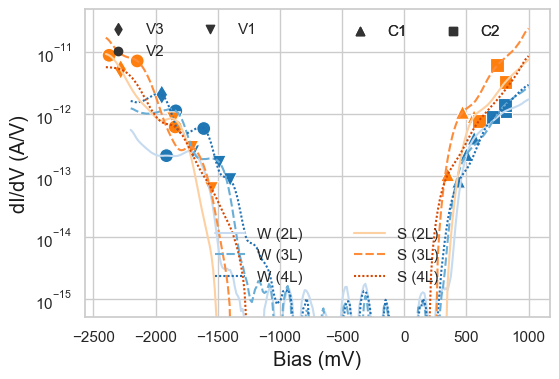

In [59]:
sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


fig,axs = plt.subplots(figsize = (6,4))
sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V2,V1,C1,C2 only.
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML',markers =['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
axs.set_ylabel('dI/dV (A/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# divide legends 

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'V3','V2', 'V1', 'C1', 'C2',  'S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles0[:3]+handles0[-3:]
labels_WS = labels0[:3]+labels0[-3:]

handles_W = handles0[:3]
labels_W = labels0[:3]

handles_S = handles0[-3:]
labels_S = labels0[-3:]

handles_VC = handles0[3:-3]
labels_VC = labels0[3:-3]

handles_V = handles0[3:6]
labels_V = labels0[3:6]
handles_C = handles0[6:8]
labels_C = labels0[6:8]


# new legends
"""
legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.25) )

legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.25, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.55, 0.20),frameon= False )

legend_V = axs.legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.01, 0.90) ,frameon= False, ncol=2 )
legend_C = axs.legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.53, 0.93) ,frameon= False, ncol =2 )


'''
legend_0 = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''

# add_artist 

axs.add_artist(legend_W)
axs.add_artist(legend_S)
axs.add_artist(legend_V)
axs.add_artist(legend_C)


axs.set_yscale('log')

plt.ylim(bottom = 5E-16, top = 5E-11)
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

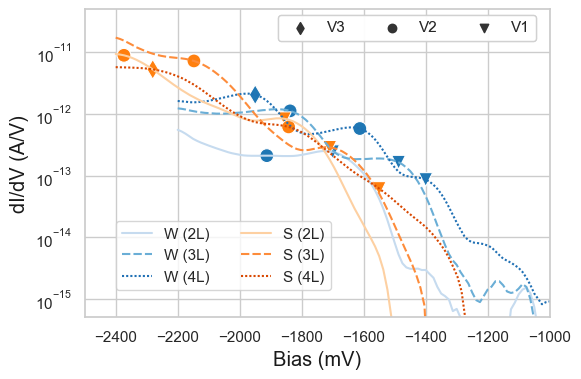

In [60]:
sns.set_style("ticks")
sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


fig,axs = plt.subplots(figsize = (6,4))
sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V2,V1,C1,C2 only.
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML',markers =['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
axs.set_ylabel('dI/dV (A/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# divide legends 

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'V3','V2', 'V1', 'C1', 'C2',  'S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles0[:3]+handles0[-3:]
labels_WS = labels0[:3]+labels0[-3:]
'''
handles_W = handles0[:3]
labels_W = labels0[:3]

handles_S = handles0[-3:]
labels_S = labels0[-3:]
'''
handles_VC = handles0[3:-3]
labels_VC = labels0[3:-3]

handles_V = handles0[3:6]
labels_V = labels0[3:6]
handles_C = handles0[6:8]
labels_C = labels0[6:8]


# new legends

legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.05, 0.20) ,frameon= True, ncol=2  )
"""
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
'''
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.15, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.35, 0.20),frameon= False )
'''
legend_V = axs.legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.94) ,frameon= True, ncol=3 )
'''
legend_C = axs.legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.53, 0.93) ,frameon= False, ncol =2 )
'''

'''
legend_0 = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''

# add_artist 

#axs.add_artist(legend_W)
#axs.add_artist(legend_S)
axs.add_artist(legend_WS)

axs.add_artist(legend_V)
#axs.add_artist(legend_C)


axs.set_yscale('log')

plt.ylim(bottom = 5E-16, top = 5E-11)
plt.xlim((-2500, -1000))
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

In [61]:
S_234pks_woOffSet

,bias_mV_2ML,S_2ML,bias_mV_3ML,S_3ML,bias_mV_4ML,S_4ML
type,,,,,,
V2,-2373.437122,8.940000e-12,-2147.655901,7.240000e-12,-1842.187191,6.150000e-13
V1,-1855.468439,8.330000e-13,-1709.374708,2.860000e-13,-1549.999729,6.140000e-14
C1,561.718747,9.060000e-13,468.750009,1.060000e-12,349.218775,1.030000e-13
C2,814.062465,3.300000e-12,747.656223,6.130000e-12,601.562492,7.740000e-13
V3,NaN,NaN,NaN,NaN,-2280.468384,5.290000e-12


In [62]:
logoffset= 2
W_234pks_woOffSet_reorder['W_2ML_logoffset'] = W_234pks_woOffSet_reorder.W_2ML*logoffset
W_234pks_woOffSet_reorder['W_3ML_logoffset'] = W_234pks_woOffSet_reorder.W_3ML*logoffset
W_234pks_woOffSet_reorder['W_4ML_logoffset'] = W_234pks_woOffSet_reorder.W_4ML*logoffset
S_234pks_woOffSet_reorder['S_2ML_logoffset'] = S_234pks_woOffSet_reorder.S_2ML*logoffset
S_234pks_woOffSet_reorder['S_3ML_logoffset'] = S_234pks_woOffSet_reorder.S_3ML*logoffset
S_234pks_woOffSet_reorder['S_4ML_logoffset'] = S_234pks_woOffSet_reorder.S_4ML*logoffset

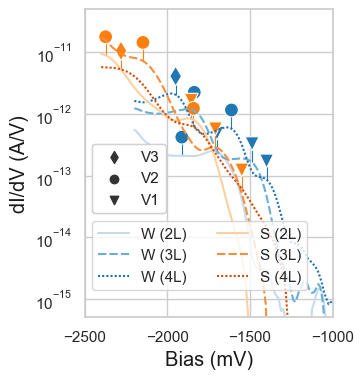

In [63]:
sns.set_style("ticks")
sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


fig,axs = plt.subplots(figsize = (3.2,4))
sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V3,V2,V1,C1,C2


# W_234pks_woOffSet+ '|'
sns.scatterplot(data = W_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)


# W_234pks_woOffSet + log offset
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'W_2ML_logoffset',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'W_3ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'W_4ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)



# S_234pks_woOffSet+ '|'
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)

sns.scatterplot(data = S_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)

# S_234pks_woOffSet + log offset
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML_logoffset',
                color  = 'tab:orange', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
'''
# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML',markers =['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
'''
axs.set_ylabel('dI/dV (A/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# divide legends 

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'V3','V2', 'V1', 'C1', 'C2',  'S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles0[:3]+handles0[-3:]
labels_WS = labels0[:3]+labels0[-3:]
'''
handles_W = handles0[:3]
labels_W = labels0[:3]

handles_S = handles0[-3:]
labels_S = labels0[-3:]
'''
handles_VC = handles0[3:-3]
labels_VC = labels0[3:-3]

handles_V = handles0[3:6]
labels_V = labels0[3:6]
handles_C = handles0[6:8]
labels_C = labels0[6:8]


# new legends

legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.00, 0.20) ,frameon= True, ncol=2  )
"""
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
'''
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.15, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.35, 0.20),frameon= False )
'''
legend_V = axs.legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.00, 0.45) ,frameon= True, ncol=1 )
'''
legend_C = axs.legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.53, 0.93) ,frameon= False, ncol =2 )
'''

'''
legend_0 = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''

# add_artist 

#axs.add_artist(legend_W)
#axs.add_artist(legend_S)
axs.add_artist(legend_WS)

axs.add_artist(legend_V)
#axs.add_artist(legend_C)


axs.set_yscale('log')

plt.ylim(bottom = 5E-16, top = 5E-11)
plt.xlim((-2500, -1000))
plt.savefig('W_S_LDOS_Peaks_VBLog.svg')
plt.show()

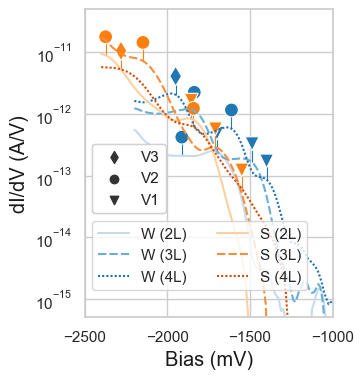

In [64]:
sns.set_style("ticks")
sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


fig,axs = plt.subplots(figsize = (3.2,4))
sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V3,V2,V1,C1,C2


# W_234pks_woOffSet+ '|'
sns.scatterplot(data = W_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)


# W_234pks_woOffSet + log offset
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'W_2ML_logoffset',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'W_3ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'W_4ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)



# S_234pks_woOffSet+ '|'
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)

sns.scatterplot(data = S_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)

# S_234pks_woOffSet + log offset
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML_logoffset',
                color  = 'tab:orange', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
'''
# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML',markers =['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
'''
axs.set_ylabel('dI/dV (A/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# divide legends 

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'V3','V2', 'V1', 'C1', 'C2',  'S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles0[:3]+handles0[-3:]
labels_WS = labels0[:3]+labels0[-3:]
'''
handles_W = handles0[:3]
labels_W = labels0[:3]

handles_S = handles0[-3:]
labels_S = labels0[-3:]
'''
handles_VC = handles0[3:-3]
labels_VC = labels0[3:-3]

handles_V = handles0[3:6]
labels_V = labels0[3:6]
handles_C = handles0[6:8]
labels_C = labels0[6:8]


# new legends

legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.00, 0.20) ,frameon= True, ncol=2  )
"""
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
'''
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.15, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.35, 0.20),frameon= False )
'''
legend_V = axs.legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.00, 0.45) ,frameon= True, ncol=1 )
'''
legend_C = axs.legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.53, 0.93) ,frameon= False, ncol =2 )
'''

'''
legend_0 = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''

# add_artist 

#axs.add_artist(legend_W)
#axs.add_artist(legend_S)
axs.add_artist(legend_WS)

axs.add_artist(legend_V)
#axs.add_artist(legend_C)


axs.set_yscale('log')

plt.ylim(bottom = 5E-16, top = 5E-11)
plt.xlim((-2500, -1000))
plt.savefig('W_S_LDOS_Peaks_VBLog.svg')
plt.show()

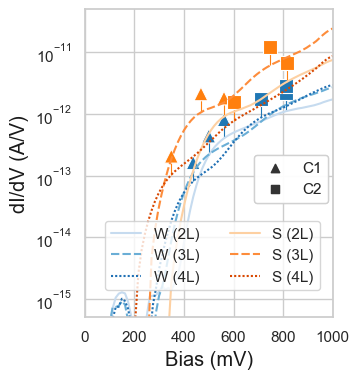

In [65]:
sns.set_style("ticks")
sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


fig,axs = plt.subplots(figsize = (3.2,4))
sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V3,V2,V1,C1,C2


# W_234pks_woOffSet+ '|'
sns.scatterplot(data = W_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)


# W_234pks_woOffSet + log offset
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'W_2ML_logoffset',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'W_3ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'W_4ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)



# S_234pks_woOffSet+ '|'
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)

sns.scatterplot(data = S_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)

# S_234pks_woOffSet + log offset
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML_logoffset',
                color  = 'tab:orange', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
'''
# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML',markers =['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
'''
axs.set_ylabel('dI/dV (A/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# divide legends 

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'V3','V2', 'V1', 'C1', 'C2',  'S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles0[:3]+handles0[-3:]
labels_WS = labels0[:3]+labels0[-3:]
'''
handles_W = handles0[:3]
labels_W = labels0[:3]

handles_S = handles0[-3:]
labels_S = labels0[-3:]
'''
handles_VC = handles0[3:-3]
labels_VC = labels0[3:-3]

handles_V = handles0[3:6]
labels_V = labels0[3:6]
handles_C = handles0[6:8]
labels_C = labels0[6:8]


# new legends

legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.05, 0.20) ,frameon= True, ncol=2  )
"""
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
'''
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.15, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.35, 0.20),frameon= False )
'''
'''
legend_V = axs.legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.00, 0.45) ,frameon= True, ncol=1 )
'''
legend_C = axs.legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.650, 0.45) ,frameon= True, ncol =1 )


'''
legend_0 = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''

# add_artist 

#axs.add_artist(legend_W)
#axs.add_artist(legend_S)
axs.add_artist(legend_WS)

#axs.add_artist(legend_V)
axs.add_artist(legend_C)


axs.set_yscale('log')

plt.ylim(bottom = 5E-16, top = 5E-11)
plt.xlim((000, 1000))
plt.savefig('W_S_LDOS_Peaks_CBLog.svg')
plt.show()

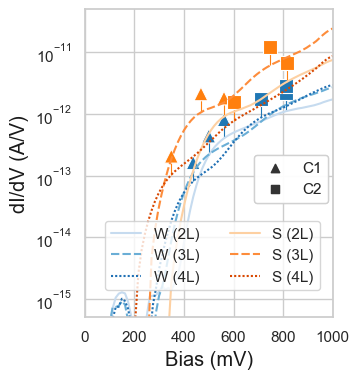

In [66]:
sns.set_style("ticks")
sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


fig,axs = plt.subplots(figsize = (3.2,4))
sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V3,V2,V1,C1,C2


# W_234pks_woOffSet+ '|'
sns.scatterplot(data = W_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)


# W_234pks_woOffSet + log offset
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'W_2ML_logoffset',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'W_3ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'W_4ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)



# S_234pks_woOffSet+ '|'
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)

sns.scatterplot(data = S_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                ax= axs)

# S_234pks_woOffSet + log offset
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML_logoffset',
                color  = 'tab:orange', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                ax= axs)
'''
# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML',markers =['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
'''
axs.set_ylabel('dI/dV (A/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# divide legends 

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'V3','V2', 'V1', 'C1', 'C2',  'S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles0[:3]+handles0[-3:]
labels_WS = labels0[:3]+labels0[-3:]
'''
handles_W = handles0[:3]
labels_W = labels0[:3]

handles_S = handles0[-3:]
labels_S = labels0[-3:]
'''
handles_VC = handles0[3:-3]
labels_VC = labels0[3:-3]

handles_V = handles0[3:6]
labels_V = labels0[3:6]
handles_C = handles0[6:8]
labels_C = labels0[6:8]


# new legends

legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.05, 0.20) ,frameon= True, ncol=2  )
"""
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
'''
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.15, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.35, 0.20),frameon= False )
'''
'''
legend_V = axs.legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.00, 0.45) ,frameon= True, ncol=1 )
'''
legend_C = axs.legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.650, 0.45) ,frameon= True, ncol =1 )


'''
legend_0 = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''

# add_artist 

#axs.add_artist(legend_W)
#axs.add_artist(legend_S)
axs.add_artist(legend_WS)

#axs.add_artist(legend_V)
axs.add_artist(legend_C)


axs.set_yscale('log')

plt.ylim(bottom = 5E-16, top = 5E-11)
plt.xlim((000, 1000))
plt.savefig('W_S_LDOS_Peaks_CBLog.svg')
plt.show()

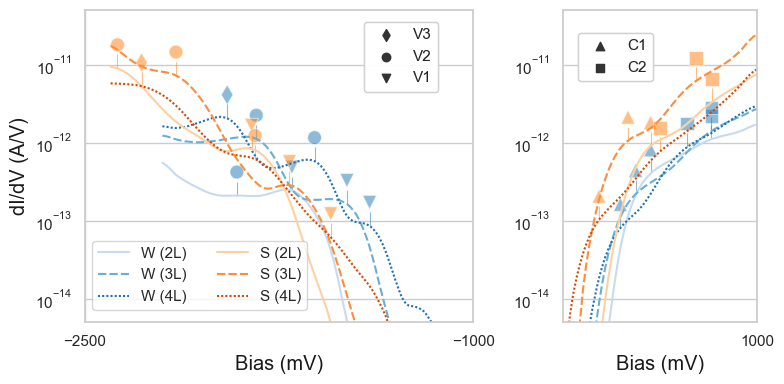

In [67]:
# VB part, log scale 

sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


fig,axes = plt.subplots(ncols = 2, figsize = (8,4), gridspec_kw={'width_ratios': [2, 1]})
axs = axes.ravel()

sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs[0])
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs[0])

# plot V3,V2,V1,C1,C2
scatter_alpha =0.5

# W_234pks_woOffSet + log offset
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'W_2ML_logoffset',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[0])

sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'W_3ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'W_4ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])

# W_234pks_woOffSet+ '|'
sns.scatterplot(data = W_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])




# S_234pks_woOffSet + log offset
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML_logoffset',
                color  = 'tab:orange', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])


# S_234pks_woOffSet+ '|'


sns.scatterplot(data = S_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])

'''
# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML',markers =['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
'''
axs[0].set_ylabel('dI/dV (A/V)', c='k', fontsize = 'large')
axs[0].set_xlabel('Bias (mV)', c='k', fontsize = 'large')


handles0, labels0 = axs[0].get_legend_handles_labels()

##

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'S (2L)', 'S (3L)', 'S (4L)',
            'V3','V2', 'V1', 'C1', 'C2', 
            'V3','V2', 'V1', 'C1', 'C2',
            'V3','V2', 'V1', 'C1', 'C2',
            ]

# divide legends 
handles_WS = handles0[:6]
labels_WS = labels0[:6]
'''
handles_W = handles0[:3]
labels_W = labels0[:3]

handles_S = handles0[-3:]
labels_S = labels0[-3:]
'''
#handles_VC = handles0[3:-3]
#labels_VC = labels0[3:-3]

handles_V = handles0[6:9]
labels_V = labels0[6:9]
#handles_C = handles0[6:8]
#labels_C = labels0[6:8]


# new legends

legend_WS = axs[0].legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.00, 0.15) ,frameon= True, ncol=2  )
"""
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
'''
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.15, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.35, 0.20),frameon= False )
'''
legend_V_0 = axs[0].legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.7, 0.85) ,frameon= True, ncol=1 )
'''
legend_C = axs.legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.53, 0.93) ,frameon= False, ncol =2 )
'''

'''
legend_0 = axs[0].legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''
# add_artist 

#axs.add_artist(legend_W)
#axs.add_artist(legend_S)
axs[0].add_artist(legend_WS)
axs[0].add_artist(legend_V_0)
#axs.add_artist(legend_C)


axs[0].set_yscale('log')
axs[0].set_xticks([-2500,  -1000])
axs[0].set_ylim(bottom = 5E-15, top = 5E-11)
axs[0].set_xlim((-2500, -1000))

#############


sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs[1])

# plot V3,V2,V1,C1,C2


# W_234pks_woOffSet + log offset
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'W_2ML_logoffset',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'W_3ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'W_4ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])


# W_234pks_woOffSet+ '|'
sns.scatterplot(data = W_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                alpha =  scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha =  scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])


# S_234pks_woOffSet + log offset
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML_logoffset',
                color  = 'tab:orange', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend = False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend = False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])

# S_234pks_woOffSet+ '|'
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs[1])

sns.scatterplot(data = S_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                alpha =  scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])

'''
# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML',markers =['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
'''
axs[1].set_ylabel('dI/dV (A/V)', c='k', fontsize = 'large')
axs[1].set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# divide legends 

handles1, labels1 = axs[1].get_legend_handles_labels()
labels1  = ['W (2L)', 'W (3L)', 'W (4L)','V3','V2', 'V1', 'C1', 'C2',  'V3','V2', 'V1', 'C1', 'C2',  'V3','V2', 'V1', 'C1', 'C2','S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles1[:3]+handles1[-3:]
labels_WS = labels1[:3]+labels1[-3:]
'''
handles_W = handles1[:3]
labels_W = labels1[:3]

handles_S = handle1[-3:]
labels_S = labels1[-3:]
'''
handles_VC = handles1[3:-3]
labels_VC = labels1[3:-3]

handles_V = handles1[3:6]
labels_V = labels0[3:6]
handles_C = handles1[6:8]
labels_C = labels1[6:8]


# new legends

legend_WS = axs[1].legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.05, 0.20) ,frameon= True, ncol=2  )
"""
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
'''
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.15, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.35, 0.20),frameon= False )
'''
'''
legend_V = axs.legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.00, 0.45) ,frameon= True, ncol=1 )
'''
legend_C = axs[1].legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.04, 0.85) ,frameon= True, ncol =1 )


'''
legend_0 = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''

# add_artist 

#axs.add_artist(legend_W)
#axs.add_artist(legend_S)
#axs[1].add_artist(legend_WS)

#axs.add_artist(legend_V)
axs[1].add_artist(legend_C)


axs[1].set_yscale('log')
axs[1].set_ylabel('')
axs[1].set_xticks([00, 1000])
axs[1].set_xlim((200, 1000))
axs[1].set_ylim((5E-15, 5E-11))




##########
plt.savefig('W_S_LDOS_Peaks_V+C.svg')
fig.tight_layout()
plt.show()

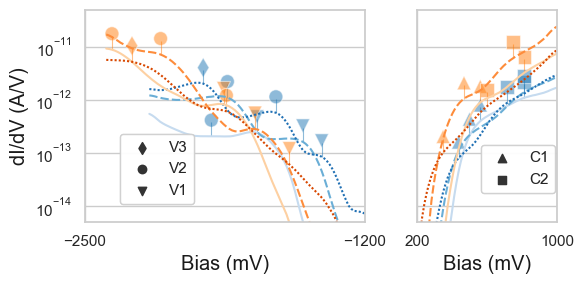

In [68]:
# VB part, log scale 

sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


fig,axes = plt.subplots(ncols = 2, figsize = (6,3), gridspec_kw={'width_ratios': [2, 1]})
axs = axes.ravel()

sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs[0])
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs[0])

# plot V3,V2,V1,C1,C2
scatter_alpha =0.5

# W_234pks_woOffSet + log offset
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'W_2ML_logoffset',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[0])

sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'W_3ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'W_4ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])

# W_234pks_woOffSet+ '|'
sns.scatterplot(data = W_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])




# S_234pks_woOffSet + log offset
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML_logoffset',
                color  = 'tab:orange', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])


# S_234pks_woOffSet+ '|'


sns.scatterplot(data = S_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[0])

'''
# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML',markers =['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
'''
axs[0].set_ylabel('dI/dV (A/V)', c='k', fontsize = 'large')
axs[0].set_xlabel('Bias (mV)', c='k', fontsize = 'large')


handles0, labels0 = axs[0].get_legend_handles_labels()

##

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'S (2L)', 'S (3L)', 'S (4L)',
            'V3','V2', 'V1', 'C1', 'C2', 
            'V3','V2', 'V1', 'C1', 'C2',
            'V3','V2', 'V1', 'C1', 'C2',
            ]

# divide legends 
#handles_WS = handles0[:6]
#labels_WS = labels0[:6]
'''
handles_W = handles0[:3]
labels_W = labels0[:3]

handles_S = handles0[-3:]
labels_S = labels0[-3:]
'''
#handles_VC = handles0[3:-3]
#labels_VC = labels0[3:-3]

handles_V = handles0[6:9]
labels_V = labels0[6:9]
#handles_C = handles0[6:8]
#labels_C = labels0[6:8]


# new legends
'''
legend_WS = axs[0].legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.00, 0.15) ,frameon= True, ncol=2  )'''
"""
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
'''
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.15, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.35, 0.20),frameon= False )
'''

legend_V_0 = axs[0].legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.1, 0.25) ,frameon= True, ncol=1 )


'''
legend_C = axs.legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.53, 0.93) ,frameon= False, ncol =2 )
'''

'''
legend_0 = axs[0].legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''
# add_artist 

#axs.add_artist(legend_W)
#axs.add_artist(legend_S)
#axs[0].add_artist(legend_WS)
axs[0].add_artist(legend_V_0)
#axs.add_artist(legend_C)


axs[0].set_yscale('log')
axs[0].set_xticks([-2500,  -1200])
axs[0].set_ylim(bottom = 5E-15, top = 5E-11)
axs[0].set_xlim((-2500, -1200))

#############


sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs[1])

# plot V3,V2,V1,C1,C2


# W_234pks_woOffSet + log offset
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'W_2ML_logoffset',
                color  = 'tab:blue', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'W_3ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = W_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'W_4ML_logoffset',
                color  = 'tab:blue', style = 'type',markers =  ['d','o','v','^','s'],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])


# W_234pks_woOffSet+ '|'
sns.scatterplot(data = W_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                alpha =  scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha =  scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])


# S_234pks_woOffSet + log offset
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML_logoffset',
                color  = 'tab:orange', style = 'type',markers = ['d','o','v','^','s'],
                legend = True, s = 100,
                alpha = scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend = False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML_logoffset',
                color  = 'tab:orange', style = 'type',markers =  ['d','o','v','^','s'],
                legend = False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])

# S_234pks_woOffSet+ '|'
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs[1])

sns.scatterplot(data = S_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend = True, s = 100,
                alpha =  scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',markers = [2,2,2,2,2],
                legend =False,s = 100,
                alpha = scatter_alpha,
                ax= axs[1])

'''
# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x =  'bias_mV_2ML', y = 'S_2ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_3ML', y = 'S_3ML',markers = ['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet_reorder,
                x = 'bias_mV_4ML', y = 'S_4ML',markers =['d','o','v','^','s'],
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
'''
axs[1].set_ylabel('dI/dV (A/V)', c='k', fontsize = 'large')
axs[1].set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# divide legends 

handles1, labels1 = axs[1].get_legend_handles_labels()
labels1  = ['W (2L)', 'W (3L)', 'W (4L)','V3','V2', 'V1', 'C1', 'C2',  'V3','V2', 'V1', 'C1', 'C2',  'V3','V2', 'V1', 'C1', 'C2','S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles1[:3]+handles1[-3:]
labels_WS = labels1[:3]+labels1[-3:]
'''
handles_W = handles1[:3]
labels_W = labels1[:3]

handles_S = handle1[-3:]
labels_S = labels1[-3:]
'''
handles_VC = handles1[3:-3]
labels_VC = labels1[3:-3]

handles_V = handles1[3:6]
labels_V = labels0[3:6]
handles_C = handles1[6:8]
labels_C = labels1[6:8]


# new legends

legend_WS = axs[1].legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.05, 0.20) ,frameon= True, ncol=2  )
"""
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70), ncol=3 )
"""
'''
legend_W = axs.legend (handles  = handles_W,
                      labels = labels_W,
                      loc='center left',
                      bbox_to_anchor=(0.15, 0.20) ,frameon= False)
legend_S = axs.legend (handles  = handles_S,
                      labels = labels_S,
                      loc='center left',
                      bbox_to_anchor=(0.35, 0.20),frameon= False )
'''
'''
legend_V = axs.legend (handles  = handles_V,
                      labels = labels_V,
                      loc='center left',
                      bbox_to_anchor=(0.00, 0.45) ,frameon= True, ncol=1 )
'''
legend_C = axs[1].legend (handles  = handles_C,
                      labels = labels_C,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.25) ,frameon= True, ncol =1 )


'''
legend_0 = axs.legend (handles  = handles0,
                      labels = labels0,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.70) )
'''

# add_artist 

#axs.add_artist(legend_W)
#axs.add_artist(legend_S)
#axs[1].add_artist(legend_WS)

#axs.add_artist(legend_V)
axs[1].add_artist(legend_C)


axs[1].set_yscale('log')
axs[1].set_ylabel('')
axs[1].set_xticks([200, 1000])

axs[1].set_yticklabels('')
axs[1].set_xlim((200, 1000))
axs[1].set_ylim((5E-15, 5E-11))




##########
plt.savefig('W_S_LDOS_Peaks_V+C_mini.svg')
fig.tight_layout()
plt.show()

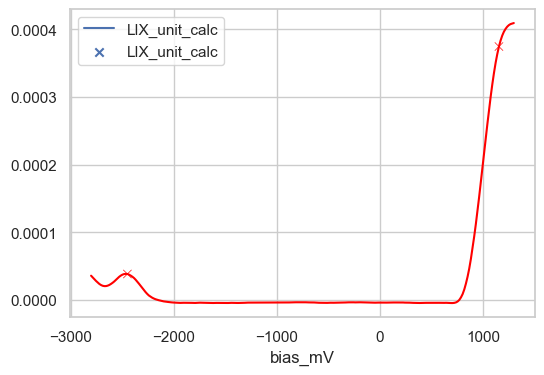

In [69]:
fig,axs = plt.subplots(figsize = (6,4))
sns.lineplot(data = WS1ML,
             ax=axs, color  = 'r')
sns.scatterplot(WS1ML.iloc[WS1ML_dps[[1,3]]],
                ax=axs,
                markers = {'LIX_unit_calc':'x'},
                #color = "Red", 
                #alpha = 1, 
                #size =10
               )
# set line color  
axs.get_children()[0].set_color('red')
# set markers color 
axs.get_children()[3].set_color('red')
axs.get_children()[4].set_color('red')
plt.show()

In [70]:
"""
# W stacks 

offset_3ML = 8E-3
offset_4ML = 16E-3

#sns.set_style("whitegrid",  rc = {"grid.linestyle": "dashed"})
#sns.set_style("whitegrid",  rc = {"axis_grid": True})
sns.set_style("white")

W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


W_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9 
W_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML
W_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML

S_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9
S_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML 
S_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML 


W_234pks_offset = W_234pks_woOffSet.copy()
S_234pks_offset = S_234pks_woOffSet.copy()

W_234pks_offset.W_2ML = (W_234pks_woOffSet.W_2ML)*1E9 +0.001
W_234pks_offset.W_3ML = (W_234pks_woOffSet.W_3ML)*1E9 + offset_3ML +0.001
W_234pks_offset.W_4ML = (W_234pks_woOffSet.W_4ML)*1E9 + offset_4ML +0.001

S_234pks_offset.S_2ML = (S_234pks_woOffSet.S_2ML)*1E9 +0.001
S_234pks_offset.S_3ML = (S_234pks_woOffSet.S_3ML)*1E9 + offset_3ML +0.001
S_234pks_offset.S_4ML = (S_234pks_woOffSet.S_4ML)*1E9 + offset_4ML +0.001
# add +0.001 offset to show marker offset 

W_234pks_woOffSet['W_2ML_1E9'] = W_234pks_woOffSet.W_2ML*1E9
W_234pks_woOffSet['W_3ML_1E9'] = W_234pks_woOffSet.W_3ML*1E9
W_234pks_woOffSet['W_4ML_1E9'] = W_234pks_woOffSet.W_4ML*1E9
S_234pks_woOffSet['S_2ML_1E9'] = S_234pks_woOffSet.S_2ML*1E9
S_234pks_woOffSet['S_3ML_1E9'] = S_234pks_woOffSet.S_3ML*1E9
S_234pks_woOffSet['S_4ML_1E9'] = S_234pks_woOffSet.S_4ML*1E9


# add +0.001 offset to show marker offset 

# add a marker indication for the
# W_234pks
# S_234pks


fig,axs = plt.subplots(figsize = (5,5))
sns.lineplot(data = W_234ML_xr_offset.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V2,V1,C1,C2 only.
sns.scatterplot(data = W_234pks_offset[:4],
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', 
                style = 'type',markers = ['o','v','^','s'],
                legend = True, s = 50,
                ax= axs)
sns.scatterplot(data = W_234pks_offset[:4],
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue',
                style = 'type',markers = ['o','v','^','s'],
                legend =False,s = 50,
                ax= axs)
sns.scatterplot(data = W_234pks_offset[:4],
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', 
                style = 'type',markers = ['o','v','^','s'],
                legend =False,s = 50,
                ax= axs)


# plot V2,V1,C1,C2 only.
sns.scatterplot(data = W_234pks_woOffSet[:4],
                x =  'bias_mV_2ML', y = 'W_2ML_1E9',
                color  = 'tab:blue', 
                style = 'type',markers = ['|','|','|','|'],
                legend = True, s = 50,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet[:4],
                x = 'bias_mV_3ML', y = 'W_3ML_1E9',
                color  = 'tab:blue',
                style = 'type',markers = ['|','|','|','|'],
                legend =False,s = 50,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet[:4],
                x = 'bias_mV_4ML', y = 'W_4ML_1E9',
                color  = 'tab:blue', 
                style = 'type',markers = ['|','|','|','|'],
                legend =False,s = 50,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(data = S_234ML_xr_offset.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet[:4],
                x =  'bias_mV_2ML', y = 'S_2ML_1E9',
                color  = 'tab:orange',
                style = 'type',markers = ['|','|','|','|'],
                legend =False,s = 50,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet[:4],
                x = 'bias_mV_3ML', y = 'S_3ML_1E9',
                color  = 'tab:orange', 
                style = 'type',markers = ['|','|','|','|'],
                legend =False,s = 50,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet[:4],
                x = 'bias_mV_4ML', y = 'S_4ML_1E9',
                color  = 'tab:orange',
                style = 'type',markers = ['|','|','|','|'],
                legend =False,s = 50,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# get legned 
handles0, labels0 = axs.get_legend_handles_labels()
# divide legends 
handles_WS = handles0[:3]+handles0[7:]
labels_WS = labels0[:3]+labels0[7:]
handles_VC = handles0[3:7]
labels_VC = labels0[3:7]
# new legends
legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.25) )

legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.4, 0.70) )
# add_artist 
axs.add_artist(legend_WS)
#axs.add_artist(legend_VC)


plt.ylim(top = 0.030)
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()"""

'\n# W stacks \n\noffset_3ML = 8E-3\noffset_4ML = 16E-3\n\n#sns.set_style("whitegrid",  rc = {"grid.linestyle": "dashed"})\n#sns.set_style("whitegrid",  rc = {"axis_grid": True})\nsns.set_style("white")\n\nW_234ML_xr_offset = W_234ML_xr.copy()\nS_234ML_xr_offset = S_234ML_xr.copy()\n\n\nW_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9 \nW_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML\nW_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML\n\nS_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9\nS_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML \nS_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML \n\n\nW_234pks_offset = W_234pks_woOffSet.copy()\nS_234pks_offset = S_234pks_woOffSet.copy()\n\nW_234pks_offset.W_2ML = (W_234pks_woOffSet.W_2ML)*1E9 +0.001\nW_234pks_offset.W_3ML = (W_234pks_woOffSet.W_3ML)*1E9 + offset_3ML +0.001\nW_234pks_offset.W_4ML = (W_234pks_woOff

In [71]:

sns.lineplot(data = WS1ML,
             ax=axs, color  = 'red')
sns.scatterplot(WS1ML.iloc[WS1ML_dps],
                ax=axs, color  = 'red')
sns.lineplot(data = WS1ML,
             ax=axs, color  = 'r')
sns.scatterplot(WS1ML.iloc[WS1ML_dps[[1,3]]],
                ax=axs,
                markers = {'LIX_unit_calc':'x'},
                #color = "Red", 
                #alpha = 1, 
                #size =10
               )
# set line color  
axs.get_children()[0].set_color('red')
# set markers color 
axs.get_children()[3].set_color('red')
axs.get_children()[4].set_color('red')

C:\Users\gkp\AppData\Local\Temp\1\ipykernel_36544\615928561.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,  10E-11))


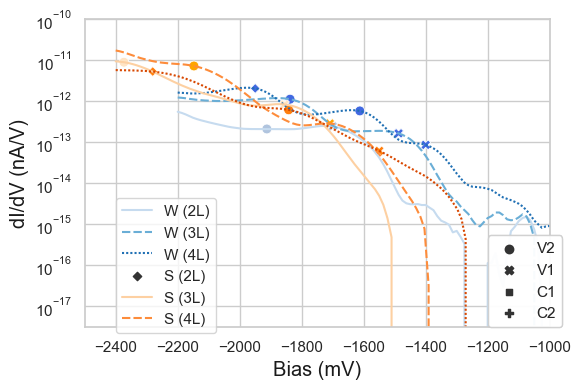

In [72]:
# add 

#sns.set_style("whitegrid")
fig,axs = plt.subplots(figsize = (6,4))

sns.lineplot(#data = W_234ML_xr_offset.to_dataframe(),
             data = W_234ML_xr.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V2,V1,C1,C2 only.
sns.scatterplot(data = W_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'lightsteelblue', style = 'type',
                legend = True, s = 50,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'royalblue', style = 'type',
                legend =False,s = 50,
                ax= axs)
sns.scatterplot(data = W_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'royalblue', style = 'type',
                legend =False,s = 50,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(#data = S_234ML_xr_offset.to_dataframe(),
             data = S_234ML_xr.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'bisque', style = 'type',
                legend =False,s = 50,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'orange', style = 'type',
                legend =False,s = 50,
                ax= axs)
sns.scatterplot(data = S_234pks_woOffSet,
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',
                legend =False,s = 50,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')


##
# get legned 
handles0, labels0 = axs.get_legend_handles_labels()

labels0  = ['W (2L)', 'W (3L)', 'W (4L)', 'V2', 'V1', 'C1', 'C2', 'S (2L)', 'S (3L)', 'S (4L)']

# divide legends 
handles_WS = handles0[:3]+handles0[7:]
labels_WS = labels0[:3]+labels0[7:]
handles_VC = handles0[3:7]
labels_VC = labels0[3:7]
# new legends
legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.05, 0.20) )
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.85, 0.15) )
# add_artist 
axs.add_artist(legend_WS)
axs.add_artist(legend_VC)


axs.set_yscale('log')

#plt.ylim(bottom = 1E-16, top = 1E-11)
plt.ylim((0,  10E-11))
plt.xlim((-2500, -1000))
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

In [73]:
labels0

['W (2L)',
 'W (3L)',
 'W (4L)',
 'V2',
 'V1',
 'C1',
 'C2',
 'S (2L)',
 'S (3L)',
 'S (4L)']

In [74]:
#  add 1L 

In [75]:
%matplotlib inline

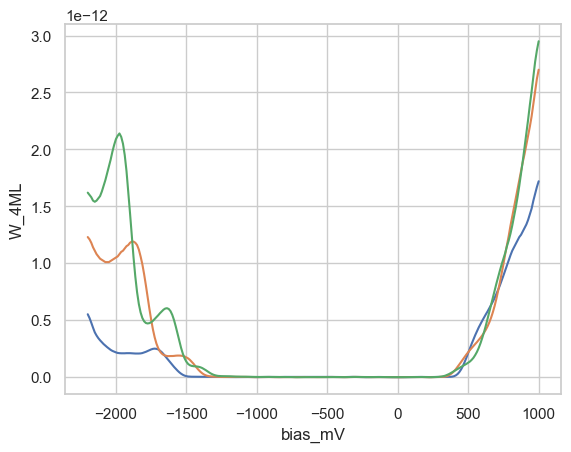

In [76]:
W_234ML_xr.W_2ML.plot()
#W_234ML_xr_offset.W_2ML.plot()
W_234ML_xr.W_3ML.plot()
#W_234ML_xr_offset.W_3ML.plot()
W_234ML_xr.W_4ML.plot()
#W_234ML_xr_offset.W_4ML.plot()
#plt.show()

In [95]:
W_234ML_df = W_234ML_xr.to_dataframe()
S_234ML_df = S_234ML_xr.to_dataframe()
WS_peaks_dict ={'W2ML': W_234ML_df.index[W2_2ML_dps_slct].values,
                 'W3ML': W_234ML_df.index[W2_3ML_dps_slct].values,#[1:],
                 'W4ML': W_234ML_df.index[W2_4ML_dps_slct].values[1:],
                 'S2ML': S_234ML_df.index[S2_2ML_dps_slct].values,
                 'S3ML': S_234ML_df.index[S2_3ML_dps_slct].values,
                 'S4ML': S_234ML_df.index[S2_4ML_dps_slct].values[1:]}
WS_peaks = pd.DataFrame(data = WS_peaks_dict, 
                        index = ['V2','V1','C1','C2']).T
WS_peaks
#  remove V3 

,V2,V1,C1,C2
W2ML,-1912.499744,-1699.999772,562.499925,812.499891
W3ML,-1837.499754,-1487.499801,499.999933,812.499891
W4ML,-1612.499784,-1399.999812,437.499941,712.499904
S2ML,-2373.437122,-1855.468439,561.718747,814.062465
S3ML,-2147.655901,-1709.374708,468.750009,747.656223
S4ML,-1842.187191,-1549.999729,349.218775,601.562492


In [174]:
print (W2_2ML_dps_slct)
print (W2_3ML_dps_slct)
print (W2_4ML_dps_slct)

[ 23  40 221 241]
[ 29  57 216 241]
[ 20  47  64 211 233]


In [96]:
## original data  + offset 
W_23pks = pd.merge(W2_2ML_pks,W2_3ML_pks,  on ='type', how = "outer")
# 2,3 merge . (left & right)
#W_23pks
W_234pks = pd.merge(W_23pks, W2_4ML_pks,  on ='type', how = "outer")

#W_234pks_offset = pd.merge(W_23pks, W2_4ML_pks,  on ='type', how = "outer")

# 23,4 merge . (left & right)
W_234pks.set_index('type', inplace = True)
W_234pks.columns  = ["bias_mV_2ML","W_2ML","bias_mV_3ML","W_3ML","bias_mV_4ML","W_4ML"]
W_234pks



S_23pks = pd.merge(S2_2ML_pks,S2_3ML_pks,  on ='type', how = "outer")
# 2,3 merge . (left & right)
#S_23pks


S_234pks = pd.merge(S_23pks, S2_4ML_pks,  on ='type', how = "outer")

#S_234pks_offset = pd.merge(S_23pks, S2_4ML_pks,  on ='type', how = "outer")
# 23,4 merge . (left & right)
S_234pks.set_index('type', inplace = True)
S_234pks.columns  = ["bias_mV_2ML","S_2ML","bias_mV_3ML","S_3ML","bias_mV_4ML","S_4ML"]
S_234pks

,bias_mV_2ML,S_2ML,bias_mV_3ML,S_3ML,bias_mV_4ML,S_4ML
type,,,,,,
V2,-2373.437122,0.008940,-2147.655901,0.011240,-1842.187191,0.008615
V1,-1855.468439,0.000833,-1709.374708,0.004286,-1549.999729,0.008061
C1,561.718747,0.000906,468.750009,0.005060,349.218775,0.008103
C2,814.062465,0.003300,747.656223,0.010130,601.562492,0.008774
V3,NaN,NaN,NaN,NaN,-2280.468384,0.013290


In [98]:
WS_peaks.loc['1ML'] =  [WS1ML.iloc[WS1ML_dps_slct].index.values[0],
                        np.nan,
                        np.nan,
                        WS1ML.iloc[WS1ML_dps_slct].index.values[-1]]
WS_peaks

,V2,V1,C1,C2
W2ML,-1912.499744,-1699.999772,562.499925,812.499891
W3ML,-1837.499754,-1487.499801,499.999933,812.499891
W4ML,-1612.499784,-1399.999812,437.499941,712.499904
S2ML,-2373.437122,-1855.468439,561.718747,814.062465
S3ML,-2147.655901,-1709.374708,468.750009,747.656223
S4ML,-1842.187191,-1549.999729,349.218775,601.562492
1ML,-2482.421745,NaN,NaN,1153.124940


In [99]:
WS_peaks= WS_peaks.reset_index()
WS_peaks= WS_peaks.rename(columns = {'index' : 'stacking'})
WS_peaks

,stacking,V2,V1,C1,C2
0,W2ML,-1912.499744,-1699.999772,562.499925,812.499891
1,W3ML,-1837.499754,-1487.499801,499.999933,812.499891
2,W4ML,-1612.499784,-1399.999812,437.499941,712.499904
3,S2ML,-2373.437122,-1855.468439,561.718747,814.062465
4,S3ML,-2147.655901,-1709.374708,468.750009,747.656223
5,S4ML,-1842.187191,-1549.999729,349.218775,601.562492
6,1ML,-2482.421745,NaN,NaN,1153.124940


In [100]:
WS_peaks['WS']=  'ML'
WS_peaks.WS[WS_peaks['stacking'].str.contains('W')] = 'W'
WS_peaks.WS[WS_peaks['stacking'].str.contains('S')] = 'S'
WS_peaks['layer']= 1
WS_peaks.layer[WS_peaks['stacking'].str.contains('2')] = 2
WS_peaks.layer[WS_peaks['stacking'].str.contains('3')] = 3
WS_peaks.layer[WS_peaks['stacking'].str.contains('4')] = 4

WS_peaks = WS_peaks.drop('stacking',axis =1)

C:\Users\gkp\AppData\Local\Temp\1\ipykernel_36544\287191082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_peaks.WS[WS_peaks['stacking'].str.contains('W')] = 'W'
C:\Users\gkp\AppData\Local\Temp\1\ipykernel_36544\287191082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_peaks.WS[WS_peaks['stacking'].str.contains('S')] = 'S'
C:\Users\gkp\AppData\Local\Temp\1\ipykernel_36544\287191082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [101]:
WS_peaks_v = WS_peaks.drop(['C1','C2'], axis=1)
WS_peaks_c = WS_peaks.drop(['V1','V2'], axis=1)

In [134]:
W_234pks_woOffSet_reorder

,bias_mV_2ML,W_2ML,bias_mV_3ML,W_3ML,bias_mV_4ML,W_4ML,W_2ML_logoffset,W_3ML_logoffset,W_4ML_logoffset
type,,,,,,,,,
V3,NaN,NaN,NaN,NaN,-1949.999738,2.050000e-12,NaN,NaN,4.100000e-12
V2,-1912.499744,2.100000e-13,-1837.499754,1.120000e-12,-1612.499784,5.790000e-13,4.200000e-13,2.240000e-12,1.158000e-12
V1,-1699.999772,2.430000e-13,-1487.499801,1.640000e-13,-1399.999812,8.590000e-14,4.860000e-13,3.280000e-13,1.718000e-13
C1,562.499925,4.040000e-13,499.999933,2.190000e-13,437.499941,8.080000e-14,8.080000e-13,4.380000e-13,1.616000e-13
C2,812.499891,1.110000e-12,812.499891,1.410000e-12,712.499904,8.790000e-13,2.220000e-12,2.820000e-12,1.758000e-12


In [102]:
# pandas column 순서 바꾸기 

WS_peaks_v

,V2,V1,WS,layer
0,-1912.499744,-1699.999772,W,2
1,-1837.499754,-1487.499801,W,3
2,-1612.499784,-1399.999812,W,4
3,-2373.437122,-1855.468439,S,2
4,-2147.655901,-1709.374708,S,3
5,-1842.187191,-1549.999729,S,4
6,-2482.421745,NaN,ML,1


In [103]:
WS_peaks_c

,C1,C2,WS,layer
0,562.499925,812.499891,W,2
1,499.999933,812.499891,W,3
2,437.499941,712.499904,W,4
3,561.718747,814.062465,S,2
4,468.750009,747.656223,S,3
5,349.218775,601.562492,S,4
6,NaN,1153.124940,ML,1


In [170]:
W_234pks_woOffSet_reorder_df_rename = W_234pks_woOffSet_reorder_df.T.reset_index()#.index #= np.array([2,3,4]).T
W_234pks_woOffSet_reorder_df_rename.rename(columns = {'index':'type'})

type,type,V3,V2,V1,C1,C2
0,bias_mV_2ML,NaN,-1912.499744,-1699.999772,562.499925,812.499891
1,bias_mV_3ML,NaN,-1837.499754,-1487.499801,499.999933,812.499891
2,bias_mV_4ML,-1949.999738,-1612.499784,-1399.999812,437.499941,712.499904


In [154]:
W_234pks_woOffSet_reorder_df = W_234pks_woOffSet_reorder[ ['bias_mV_2ML','bias_mV_3ML','bias_mV_4ML']]
S_234pks_woOffSet_reorder_df = S_234pks_woOffSet_reorder[ ['bias_mV_2ML','bias_mV_3ML','bias_mV_4ML']]
#W_234pks_woOffSet_reorder.melt(id_vars =	)
pd.concat ([W_234pks_woOffSet_reorder_df, S_234pks_woOffSet_reorder_df], axis =1)

,bias_mV_2ML,bias_mV_3ML,bias_mV_4ML,bias_mV_2ML,bias_mV_3ML,bias_mV_4ML
type,,,,,,
V3,NaN,NaN,-1949.999738,NaN,NaN,-2280.468384
V2,-1912.499744,-1837.499754,-1612.499784,-2373.437122,-2147.655901,-1842.187191
V1,-1699.999772,-1487.499801,-1399.999812,-1855.468439,-1709.374708,-1549.999729
C1,562.499925,499.999933,437.499941,561.718747,468.750009,349.218775
C2,812.499891,812.499891,712.499904,814.062465,747.656223,601.562492


In [153]:
#S_234pks_woOffSet_reorder_df#.melt()
WS_peaks

,V2,V1,C1,C2,WS,layer
0,-1912.499744,-1699.999772,562.499925,812.499891,W,2
1,-1837.499754,-1487.499801,499.999933,812.499891,W,3
2,-1612.499784,-1399.999812,437.499941,712.499904,W,4
3,-2373.437122,-1855.468439,561.718747,814.062465,S,2
4,-2147.655901,-1709.374708,468.750009,747.656223,S,3
5,-1842.187191,-1549.999729,349.218775,601.562492,S,4
6,-2482.421745,NaN,NaN,1153.124940,ML,1


In [143]:
WS_peaks_melt

,WS,layer,peak_type,peak(mV)
0,W,2,V2,-1912.499744
1,W,3,V2,-1837.499754
2,W,4,V2,-1612.499784
3,S,2,V2,-2373.437122
4,S,3,V2,-2147.655901
5,S,4,V2,-1842.187191
6,ML,1,V2,-2482.421745
7,W,2,V1,-1699.999772
8,W,3,V1,-1487.499801
9,W,4,V1,-1399.999812


In [189]:
WS_peaks_melt = WS_peaks.melt(id_vars = ['WS','layer'])
WS_peaks_melt = WS_peaks_melt.rename (columns = {'variable': 'peak_type','value':'peak(mV)' })

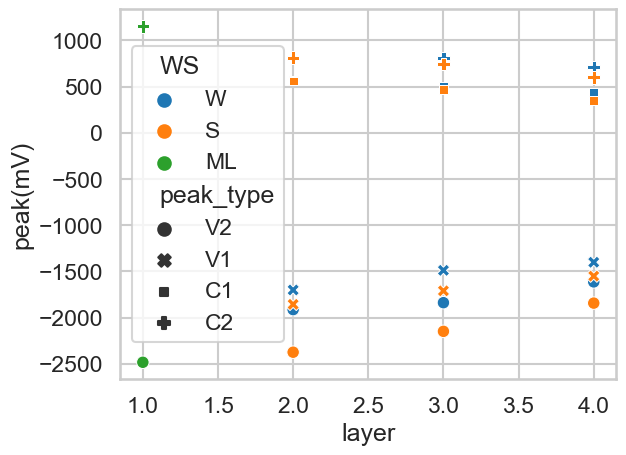

In [190]:
sns.scatterplot(data = WS_peaks_melt,x = 'layer', y = 'peak(mV)', 
                            hue = 'WS',style = 'peak_type')
plt.show()

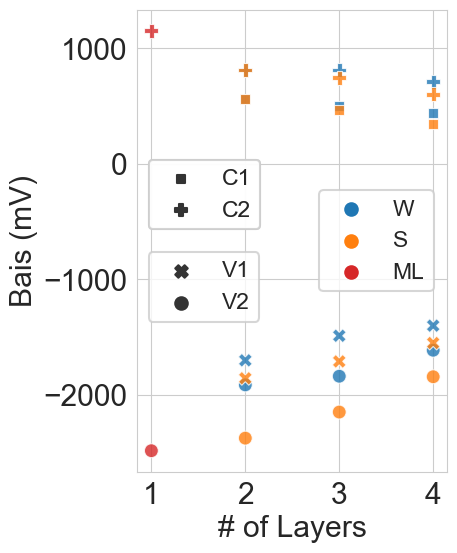

In [130]:
sns.reset_defaults()
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize = (4,6))

sns.set_context("talk")
pks_1234 = sns.scatterplot (data = WS_peaks_melt, 
                            x = 'layer', y = 'peak(mV)', 
                            hue = 'WS',style = 'peak_type',
                            palette=['tab:blue','tab:orange','tab:Red'],
                            s = 100,alpha = 0.8,
                            ax=ax)
#pks_1234.legend
#ax.set_ylabel('Bias (mV)', c='k', fontsize = 'large')
#ax.set_xlabel('Number of layers', c='k', fontsize = 'large')
ax.set_xticks([1, 2,3, 4])

plt.xticks(fontsize = "large")
plt.yticks(fontsize = "large")
ax.tick_params(axis='both', which='major', labelsize='large')
plt.ylabel('Bais (mV)', fontsize = 'large')
plt.xlabel('# of Layers', fontsize = 'large')

#ax.legend(fontsize = "large")
handles_0, labels_0 = ax.get_legend_handles_labels()


legend_ws = ax.legend (handles  = handles_0[1:4], 
                       labels =labels_0[1:4],
                       loc='center left',
                       bbox_to_anchor=(0.55, 0.5))

handles_c = np.array(handles_0[5:7]).flatten().tolist()[::-1]
labels_c =   np.array(labels_0[5:7]).flatten().tolist()[::-1]

legend_c = ax.legend (handles  = handles_c,
                      labels = labels_c,
                      loc='center left',
                      bbox_to_anchor=(0, 0.4) )

handles_v =np.array(handles_0[7:]).flatten().tolist()
labels_v = np.array(labels_0[7:]).flatten().tolist()

legend_v = ax.legend ( handles  = handles_v,
                      labels = labels_v,
                      loc='center left',
                      bbox_to_anchor=(0, 0.6) )

'''
handles_cv =  np.array (handles_0[5:]).reshape(2,2).T.flatten().tolist()
labels_cv =  np.array (labels_0[5:]).reshape(2,2).T.flatten().tolist()
legend_cv = ax.legend (handles  = handles_cv,
                      labels = labels_cv,
                      loc='center left',
                      bbox_to_anchor=(0.5, 0.5) )
'''

ax.add_artist(legend_ws)
ax.add_artist(legend_c)
ax.add_artist(legend_v)

#ax.add_artist(legend_cv)
plt.savefig('peak_plot.svg')
plt.show()

In [207]:
WS_peaks_melt_xoffset = WS_peaks_melt.copy()
WS_peaks_melt_xoffset

WS_peaks_melt_xoffset['layer_offset'] = WS_peaks_melt_xoffset.apply(
    lambda row: row['layer'] - 0.05 if row['WS'] == 'W' else row['layer'] + 0.05, axis=1)
WS_peaks_melt_xoffset

,WS,layer,peak_type,peak(mV),layer_offset
0,W,2,V2,-1912.499744,1.95
1,W,3,V2,-1837.499754,2.95
2,W,4,V2,-1612.499784,3.95
3,S,2,V2,-2373.437122,2.05
4,S,3,V2,-2147.655901,3.05
5,S,4,V2,-1842.187191,4.05
6,ML,1,V2,-2482.421745,1.05
7,W,2,V1,-1699.999772,1.95
8,W,3,V1,-1487.499801,2.95
9,W,4,V1,-1399.999812,3.95


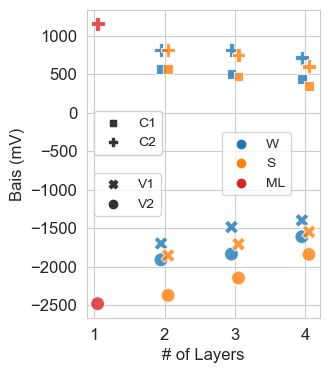

In [209]:
sns.reset_defaults()
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize = (3,4))

###############
# to avoid overlap --> adjust X offset 

pks_1234 = sns.scatterplot (data = WS_peaks_melt_xoffset, 
                            x = 'layer_offset', y = 'peak(mV)', 
                            hue = 'WS',style = 'peak_type',
                            palette=['tab:blue','tab:orange','tab:Red'],
                            s = 100,alpha = 0.8,
                            ax=ax)







#pks_1234.legend
#ax.set_ylabel('Bias (mV)', c='k', fontsize = 'large')
#ax.set_xlabel('Number of layers', c='k', fontsize = 'large')
ax.set_xticks([1, 2,3, 4])

plt.xticks(fontsize = "large")
plt.yticks(fontsize = "large")
ax.tick_params(axis='both', which='major', labelsize='large')
plt.ylabel('Bais (mV)', fontsize = 'large')
plt.xlabel('# of Layers', fontsize = 'large')

#ax.legend(fontsize = "large")
handles_0, labels_0 = ax.get_legend_handles_labels()


legend_ws = ax.legend (handles  = handles_0[1:4], 
                       labels =labels_0[1:4],
                       loc='center left',
                       bbox_to_anchor=(0.55, 0.5))

handles_c = np.array(handles_0[5:7]).flatten().tolist()[::-1]
labels_c =   np.array(labels_0[5:7]).flatten().tolist()[::-1]

legend_c = ax.legend (handles  = handles_c,
                      labels = labels_c,
                      loc='center left',
                      bbox_to_anchor=(0, 0.4) )

handles_v =np.array(handles_0[7:]).flatten().tolist()
labels_v = np.array(labels_0[7:]).flatten().tolist()

legend_v = ax.legend ( handles  = handles_v,
                      labels = labels_v,
                      loc='center left',
                      bbox_to_anchor=(0, 0.6) )

'''
handles_cv =  np.array (handles_0[5:]).reshape(2,2).T.flatten().tolist()
labels_cv =  np.array (labels_0[5:]).reshape(2,2).T.flatten().tolist()
legend_cv = ax.legend (handles  = handles_cv,
                      labels = labels_cv,
                      loc='center left',
                      bbox_to_anchor=(0.5, 0.5) )
'''

ax.add_artist(legend_ws)
ax.add_artist(legend_c)
ax.add_artist(legend_v)

#ax.add_artist(legend_cv)
plt.savefig('peak_plot.svg')
plt.show()

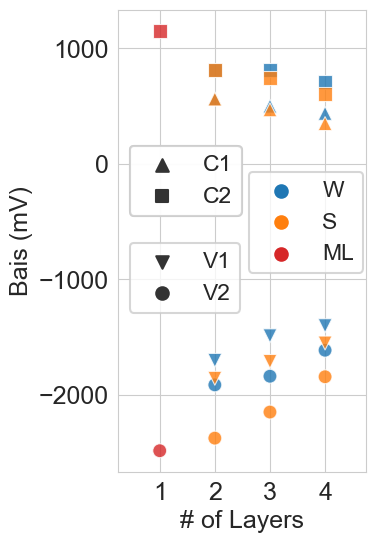

In [131]:
sns.reset_defaults()
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize = (3.2,6))

sns.set_context("talk")
pks_1234 = sns.scatterplot (data = WS_peaks_melt, 
                            x = 'layer', y = 'peak(mV)', 
                            hue = 'WS',style = 'peak_type',
                            palette=['tab:blue','tab:orange','tab:Red'],
                            s = 100,alpha = 0.8,
                            markers = ['o','v','^','s'],
                            ax=ax)
#pks_1234.legend
#ax.set_ylabel('Bias (mV)', c='k', fontsize = 'large')
#ax.set_xlabel('Number of layers', c='k', fontsize = 'large')
ax.set_xticks([1, 2, 3, 4])

plt.xticks(fontsize = "medium")
plt.yticks(fontsize = "medium")
ax.tick_params(axis='both', which='major', labelsize='medium')
plt.ylabel('Bais (mV)', fontsize = 'medium')
plt.xlabel('# of Layers', fontsize = 'medium')

#ax.legend(fontsize = "large")
handles_0, labels_0 = ax.get_legend_handles_labels()


legend_ws = ax.legend (handles  = handles_0[1:4], 
                       labels =labels_0[1:4],
                       loc='center left',
                       bbox_to_anchor=(0.48, 0.54))

handles_c = np.array(handles_0[5:7]).flatten().tolist()[::-1]
labels_c =   np.array(labels_0[5:7]).flatten().tolist()[::-1]

legend_c = ax.legend (handles  = handles_c,
                      labels = labels_c,
                      loc='center left',
                      bbox_to_anchor=(0, 0.42) )

handles_v =np.array(handles_0[7:]).flatten().tolist()
labels_v = np.array(labels_0[7:]).flatten().tolist()

legend_v = ax.legend ( handles  = handles_v,
                      labels = labels_v,
                      loc='center left',
                      bbox_to_anchor=(0, 0.63) )

'''
handles_cv =  np.array (handles_0[5:]).reshape(2,2).T.flatten().tolist()
labels_cv =  np.array (labels_0[5:]).reshape(2,2).T.flatten().tolist()
legend_cv = ax.legend (handles  = handles_cv,
                      labels = labels_cv,
                      loc='center left',
                      bbox_to_anchor=(0.5, 0.5) )
'''

ax.add_artist(legend_ws)
ax.add_artist(legend_c)
ax.add_artist(legend_v)
ax.set_yticks([-2000,-1000,0,1000])
ax.set_xlim((0.25,4.75))
#ax.add_artist(legend_cv)
plt.savefig('peak_plot_V21C12.svg')
plt.show()

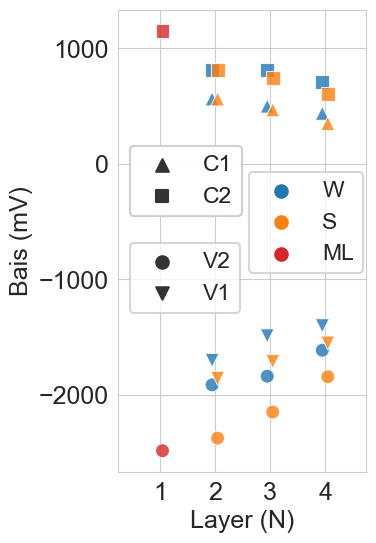

In [217]:
sns.reset_defaults()
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize = (3.2,6))

sns.set_context("talk")
pks_1234 = sns.scatterplot (data = WS_peaks_melt_xoffset, 
                            x = 'layer_offset', y = 'peak(mV)', 
                            hue = 'WS',style = 'peak_type',
                            palette=['tab:blue','tab:orange','tab:Red'],
                            s = 100,alpha = 0.8,
                            markers = ['o','v','^','s'],
                            ax=ax)
#pks_1234.legend
#ax.set_ylabel('Bias (mV)', c='k', fontsize = 'large')
#ax.set_xlabel('Number of layers', c='k', fontsize = 'large')
ax.set_xticks([1, 2, 3, 4])

plt.xticks(fontsize = "medium")
plt.yticks(fontsize = "medium")
ax.tick_params(axis='both', which='major', labelsize='medium')
plt.ylabel('Bais (mV)', fontsize = 'medium')
plt.xlabel('Layer (N)', fontsize = 'medium')

#ax.legend(fontsize = "large")
handles_0, labels_0 = ax.get_legend_handles_labels()


legend_ws = ax.legend (handles  = handles_0[1:4], 
                       labels =labels_0[1:4],
                       loc='center left',
                       bbox_to_anchor=(0.48, 0.54))

handles_c = np.array(handles_0[5:7]).flatten().tolist()[::-1]
labels_c =   np.array(labels_0[5:7]).flatten().tolist()[::-1]

legend_c = ax.legend (handles  = handles_c[::-1],
                      labels = labels_c[::-1],
                      loc='center left',
                      bbox_to_anchor=(0, 0.42) )

handles_v =np.array(handles_0[7:]).flatten().tolist()
labels_v = np.array(labels_0[7:]).flatten().tolist()

legend_v = ax.legend ( handles  = handles_v,
                      labels = labels_v,
                      loc='center left',
                      bbox_to_anchor=(0, 0.63) )

'''
handles_cv =  np.array (handles_0[5:]).reshape(2,2).T.flatten().tolist()
labels_cv =  np.array (labels_0[5:]).reshape(2,2).T.flatten().tolist()
legend_cv = ax.legend (handles  = handles_cv,
                      labels = labels_cv,
                      loc='center left',
                      bbox_to_anchor=(0.5, 0.5) )
'''

ax.add_artist(legend_ws)
ax.add_artist(legend_c)
ax.add_artist(legend_v)
ax.set_yticks([-2000,-1000,0,1000])
ax.set_xlim((0.25,4.75))
#ax.add_artist(legend_cv)
plt.savefig('peak_plot_V21C12.svg')
plt.show()

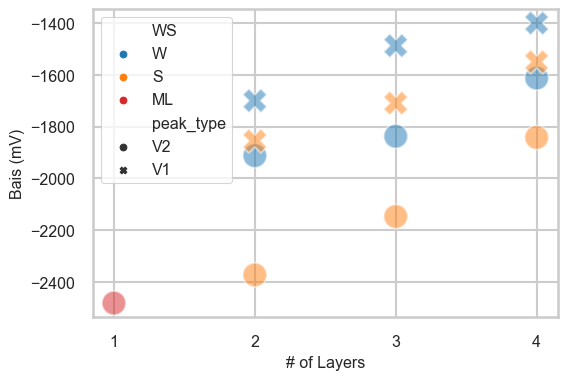

In [107]:
WS_peaks_v = WS_peaks.drop(['C1','C2'], axis=1)


WS_peaks_v_melt = WS_peaks_v.melt(id_vars = ['WS','layer'])
WS_peaks_v_melt = WS_peaks_v_melt.rename (columns = {'variable': 'peak_type','value':'peak(mV)' })

fig,ax = plt.subplots(figsize = (6,4))
sns.set_context("paper")
pks_1234 = sns.scatterplot (data = WS_peaks_v_melt,
                            x = 'layer', y = 'peak(mV)', 
                            hue = 'WS',style = 'peak_type',
                            palette=['tab:blue','tab:orange','tab:Red'],
                            s = 300,alpha =0.5,
                            ax=ax)
ax.set_xticks([1, 2,3, 4])
ax.legend(fontsize = "large")
plt.xticks(fontsize = "large")
plt.yticks(fontsize = "large")
ax.tick_params(axis='both', which='major', labelsize='large')
plt.ylabel('Bais (mV)', fontsize = 'large')
plt.xlabel('# of Layers', fontsize = 'large')
plt.savefig('peak_plot_v.svg')
plt.show()
#pks_1234.legend
#plt.savefig('peak_plot.svg')

In [ ]:
WS_peaks_c = WS_peaks.drop(['V1','V2'], axis=1)


WS_peaks_c_melt = WS_peaks_c.melt(id_vars = ['WS','layer'])
WS_peaks_c_melt = WS_peaks_c_melt.rename (columns = {'variable': 'peak_type','value':'peak(mV)' })

fig,ax = plt.subplots(figsize = (6,4))
sns.set_context("paper")
pks_1234 = sns.scatterplot (data = WS_peaks_c_melt,
                            x = 'layer', y = 'peak(mV)', 
                            hue = 'WS',style = 'peak_type',
                            palette=['tab:blue','tab:orange','tab:Red'],
                            s = 300,alpha =0.5,
                            ax=ax)
ax.set_xticks([1, 2,3, 4])

ax.legend(fontsize = "large")
plt.xticks(fontsize = "large")
plt.yticks(fontsize = "large")
ax.tick_params(axis='both', which='major', labelsize='large')
plt.ylabel('Bais (mV)', fontsize = 'large')
plt.xlabel('# of Layers', fontsize = 'large')
plt.savefig('peak_plot_v.svg')
plt.savefig('peak_plot_c.svg')
plt.show()
#pks_1234.legend
#plt.savefig('peak_plot.svg')

In [ ]:
WS_peaks_melt

In [ ]:
"""sns.scatterplot (data = WS_peaks_melt, 
                 x = 'layer', y = 'value', 
                 hue = 'WS',style = 'variable',
                 palette=['green','orange','brown'],
                 marker= [])"""

In [ ]:
WS_peaks_melt.dropna()

In [ ]:
#WS_peaks_melt = WS_peaks_melt.dropna(subset=['NaN'])
sns.scatterplot (data =  WS_peaks_melt.dropna(), 
                 x = 'layer', y = 'peak(mV)', 
                 hue = 'WS',#style = 'variable',
                 palette=['green','orange','brown'],
                 #marker= []
                )
plt.show()

In [ ]:
WS_peaks